## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
#print current env PATH variable value
!printenv PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [2]:
#Update PATH environment variable
# Append /root/.local/bin to the existing path environment variable to get rid of these installation warnings - f2py, f2py3 and f2py3.10 are installed in '/root/.local/bin' which is not on PATH.
%env PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/root/.local/bin

env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/root/.local/bin


In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [4]:
# Install uszipcode to handle Zipcode data
!pip install sqlalchemy_mate==2.0.0
!pip install uszipcode

  Attempting uninstall: sqlalchemy_mate
    Found existing installation: sqlalchemy_mate 2.0.0.3
    Uninstalling sqlalchemy_mate-2.0.0.3:
      Successfully uninstalled sqlalchemy_mate-2.0.0.3


In [5]:
#convert zipcode to uszipcode to get rid off warning
#/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
#warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
!pip install python-Levenshtein

In [6]:
# View python version
!python --version

Python 3.10.12


In [7]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV


# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

#Label Encoding
from sklearn.preprocessing import LabelEncoder

## Loading the dataset

In [8]:
# import drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# read the data from drive.Load the dataset
df = pd.read_csv("/content/drive/My Drive/Project/Loan_Modelling.csv")

#create a copy of the dataset that will be used for data manipulation and visualization
data = df.copy()

## Data Overview

* Observations
* Sanity checks

**Check the shape of the dataset**

In [10]:
df.shape

(5000, 14)

- The dataset has 5000 rows and 14 columns.

**Info of the data columns**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- All are numerical variables in the data. 13 are int and one is float.
- Personal_Loan, Securities_Account,CD_Account,Online,and Credit_Card are already 0 or 1 values for (No or Yes) and does not need to be encoded.
- CCAvg is float type and all others are integer
- Zipcode is numerical int and will need to be treated to find the corresponding City

**Top 5 dataset**

In [12]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

**Last 5 rows**

In [13]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

**Get summary statistics for the numerical columns**

In [14]:
df.describe(include="all").T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

*   Average age of loan customers is ~45
*   Average age of work expereince to customers is ~20 years
*   Cutomers Income range from 8000 to 224000 Dollors.
*   Average income of ~73000 Dollors
*   Average size of the Family is 2





## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Univariate Analysis**

Numerical Features:
['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


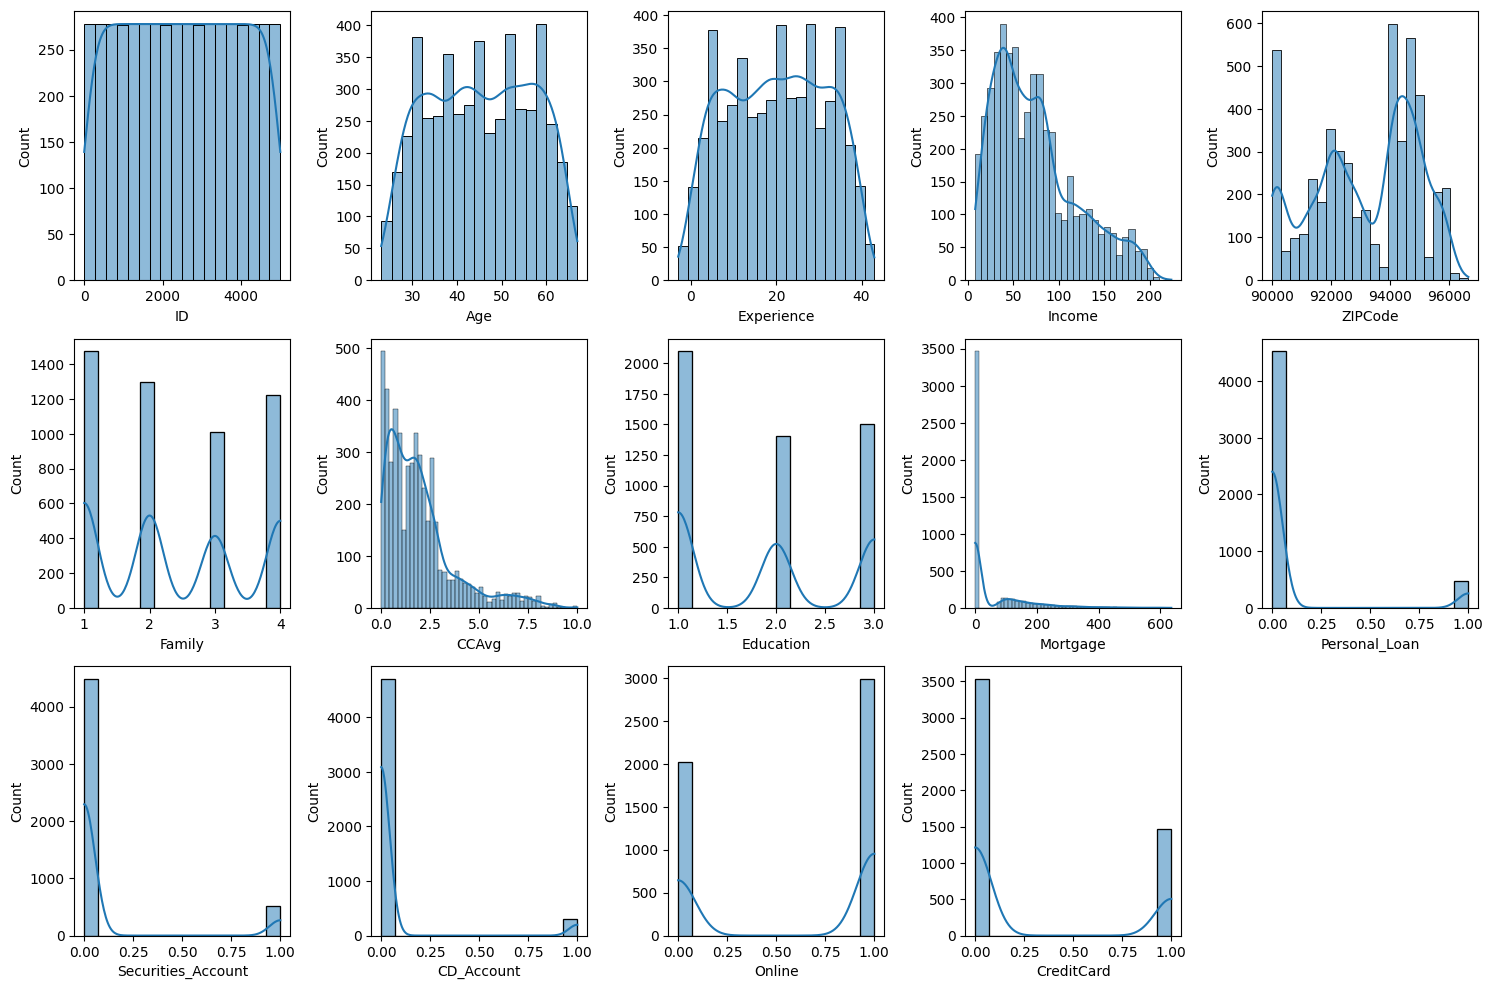

In [15]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

print("Numerical Features:")
print(features)
# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(3, 5, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature,kde='True')    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()



*   Mortgage is Right Skewed
*   Age seems to be normally distributed
*   CCAvg is right skewed
*   Very Few customers have personal loan, Securities Account , CD Account and credit card
*   There are more customers having Online account
*  There are more Under Grad customers . Graduate and Advanced/Professional are close in numbers




In [16]:
data['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [17]:
 #percentage of customers who have accepted a personal loan and the percentage of customers who have not accepted a personal loan
data['Personal_Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

 90.4% of customers who have a personal loan and the 9.6% of customers do not have a personal loan

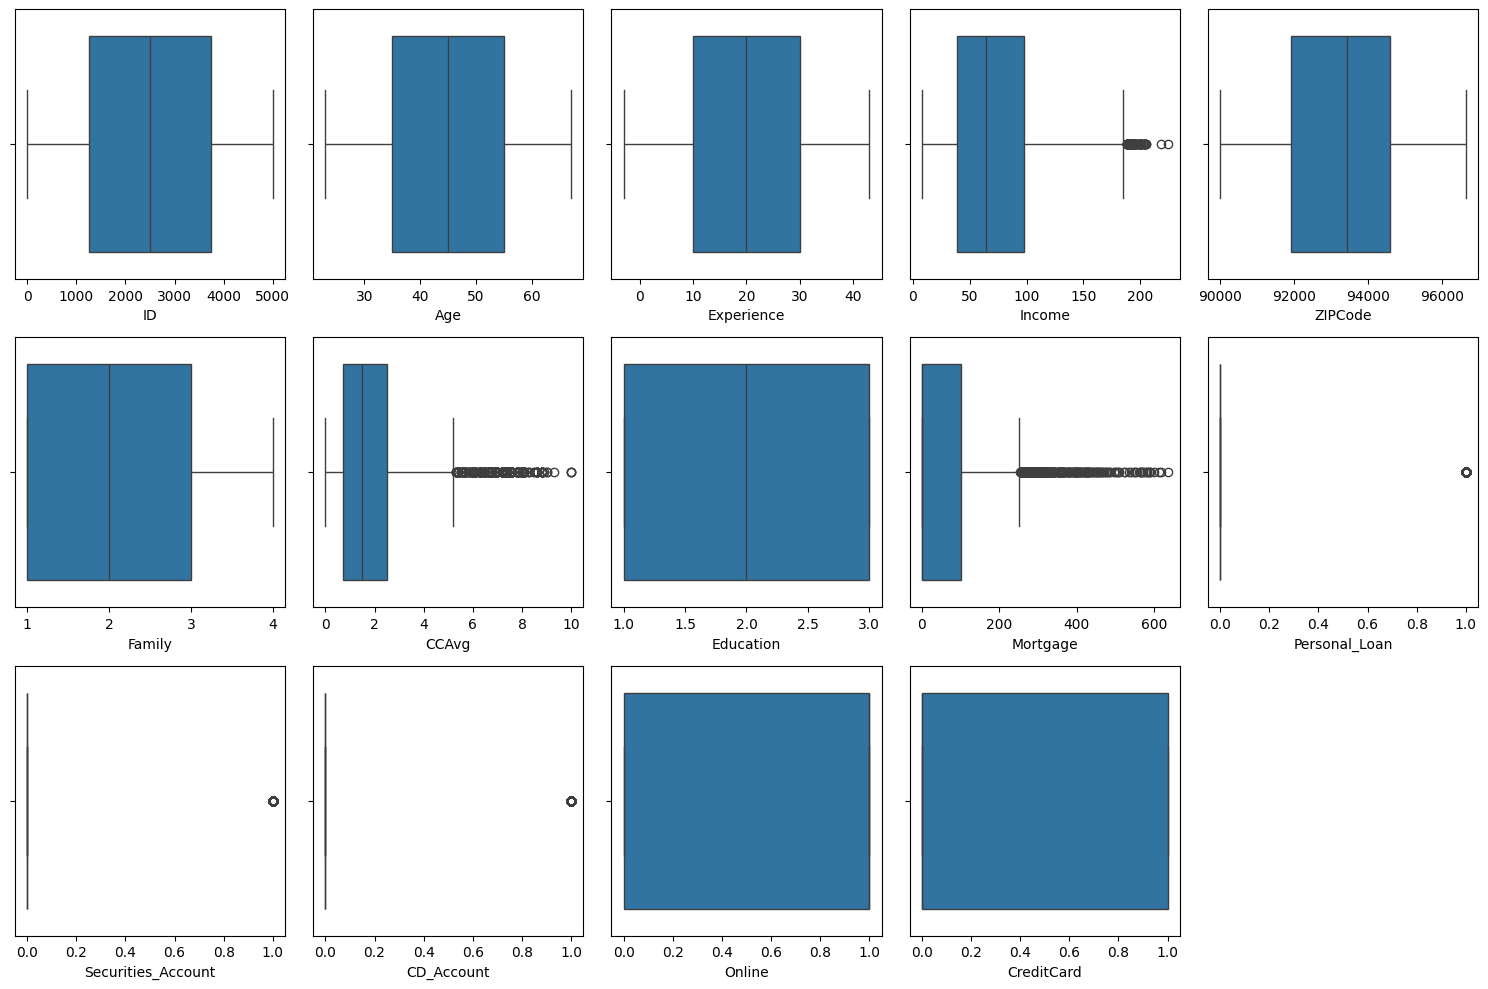

In [18]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(3, 5, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()



*   Distribution of Mortgage is right skewed.There are outliers.
*   There are outliers in CCAvg,Mortgage,Income
*   Outliers does not impact much in Decision Tree

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64 

0    4520
1     480
Name: Personal_Loan, dtype: int64 

0    89.56
1    10.44
Name: Securities_Account, dtype: float64 

0    4478
1     522
Name: Securities_Account, dtype: int64 

0    93.96
1     6.04
Name: CD_Account, dtype: float64 

0    4698
1     302
Name: CD_Account, dtype: int64 

1    59.68
0    40.32
Name: Online, dtype: float64 

1    2984
0    2016
Name: Online, dtype: int64 

0    70.6
1    29.4
Name: CreditCard, dtype: float64 

0    3530
1    1470
Name: CreditCard, dtype: int64 



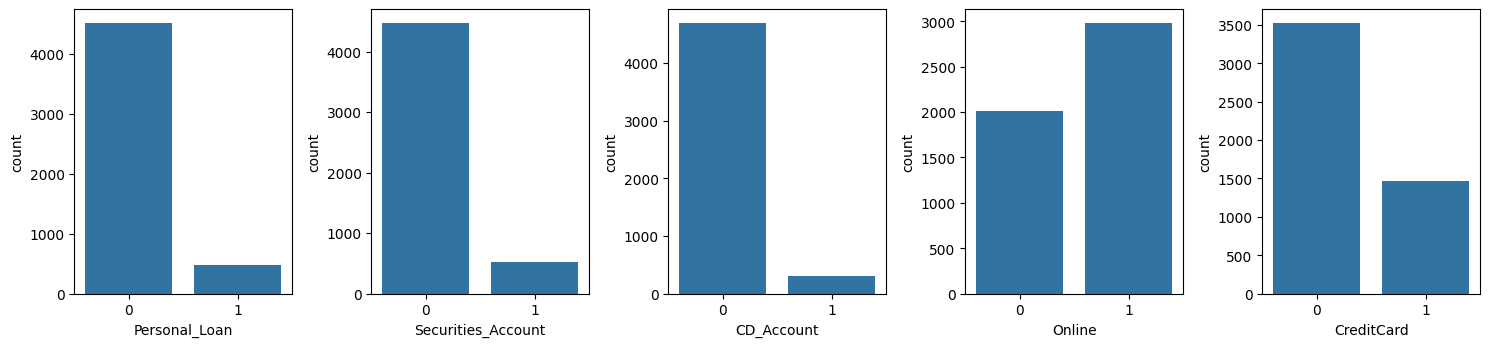

In [19]:
#Analysis of Personal Loan and other attributes
plt.figure(figsize=(15, 10))
# defining the list of numerical features to plot
selected_features = ['Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

# creating the histograms
for i, feature in enumerate(selected_features):

    plt.subplot(3, 5, i+1)    # assign a subplot in the main plot
    print(100*data[feature].value_counts(normalize=True), '\n')
    print(data[feature].value_counts(),'\n')
    # plotting the count plot for Personal_Loan
    sns.countplot(data=data, x=feature);

plt.tight_layout()    # to add spacing between plots
plt.show()

* 29.4% of customers(1470 Customers) have credit cards
* Nearly 60% of customers have Online account
* Only 10% of customers have Securities account
* Only 6% of customers have CD Account
* Only 10% of cusotmers have personal loan

**Bivariate Analysis**

Perform Bivariate Analysis using pair plot and display only the lower triangle of the scatter plot matrix. Hide the redundant upper triangle

<Figure size 8400x8400 with 0 Axes>

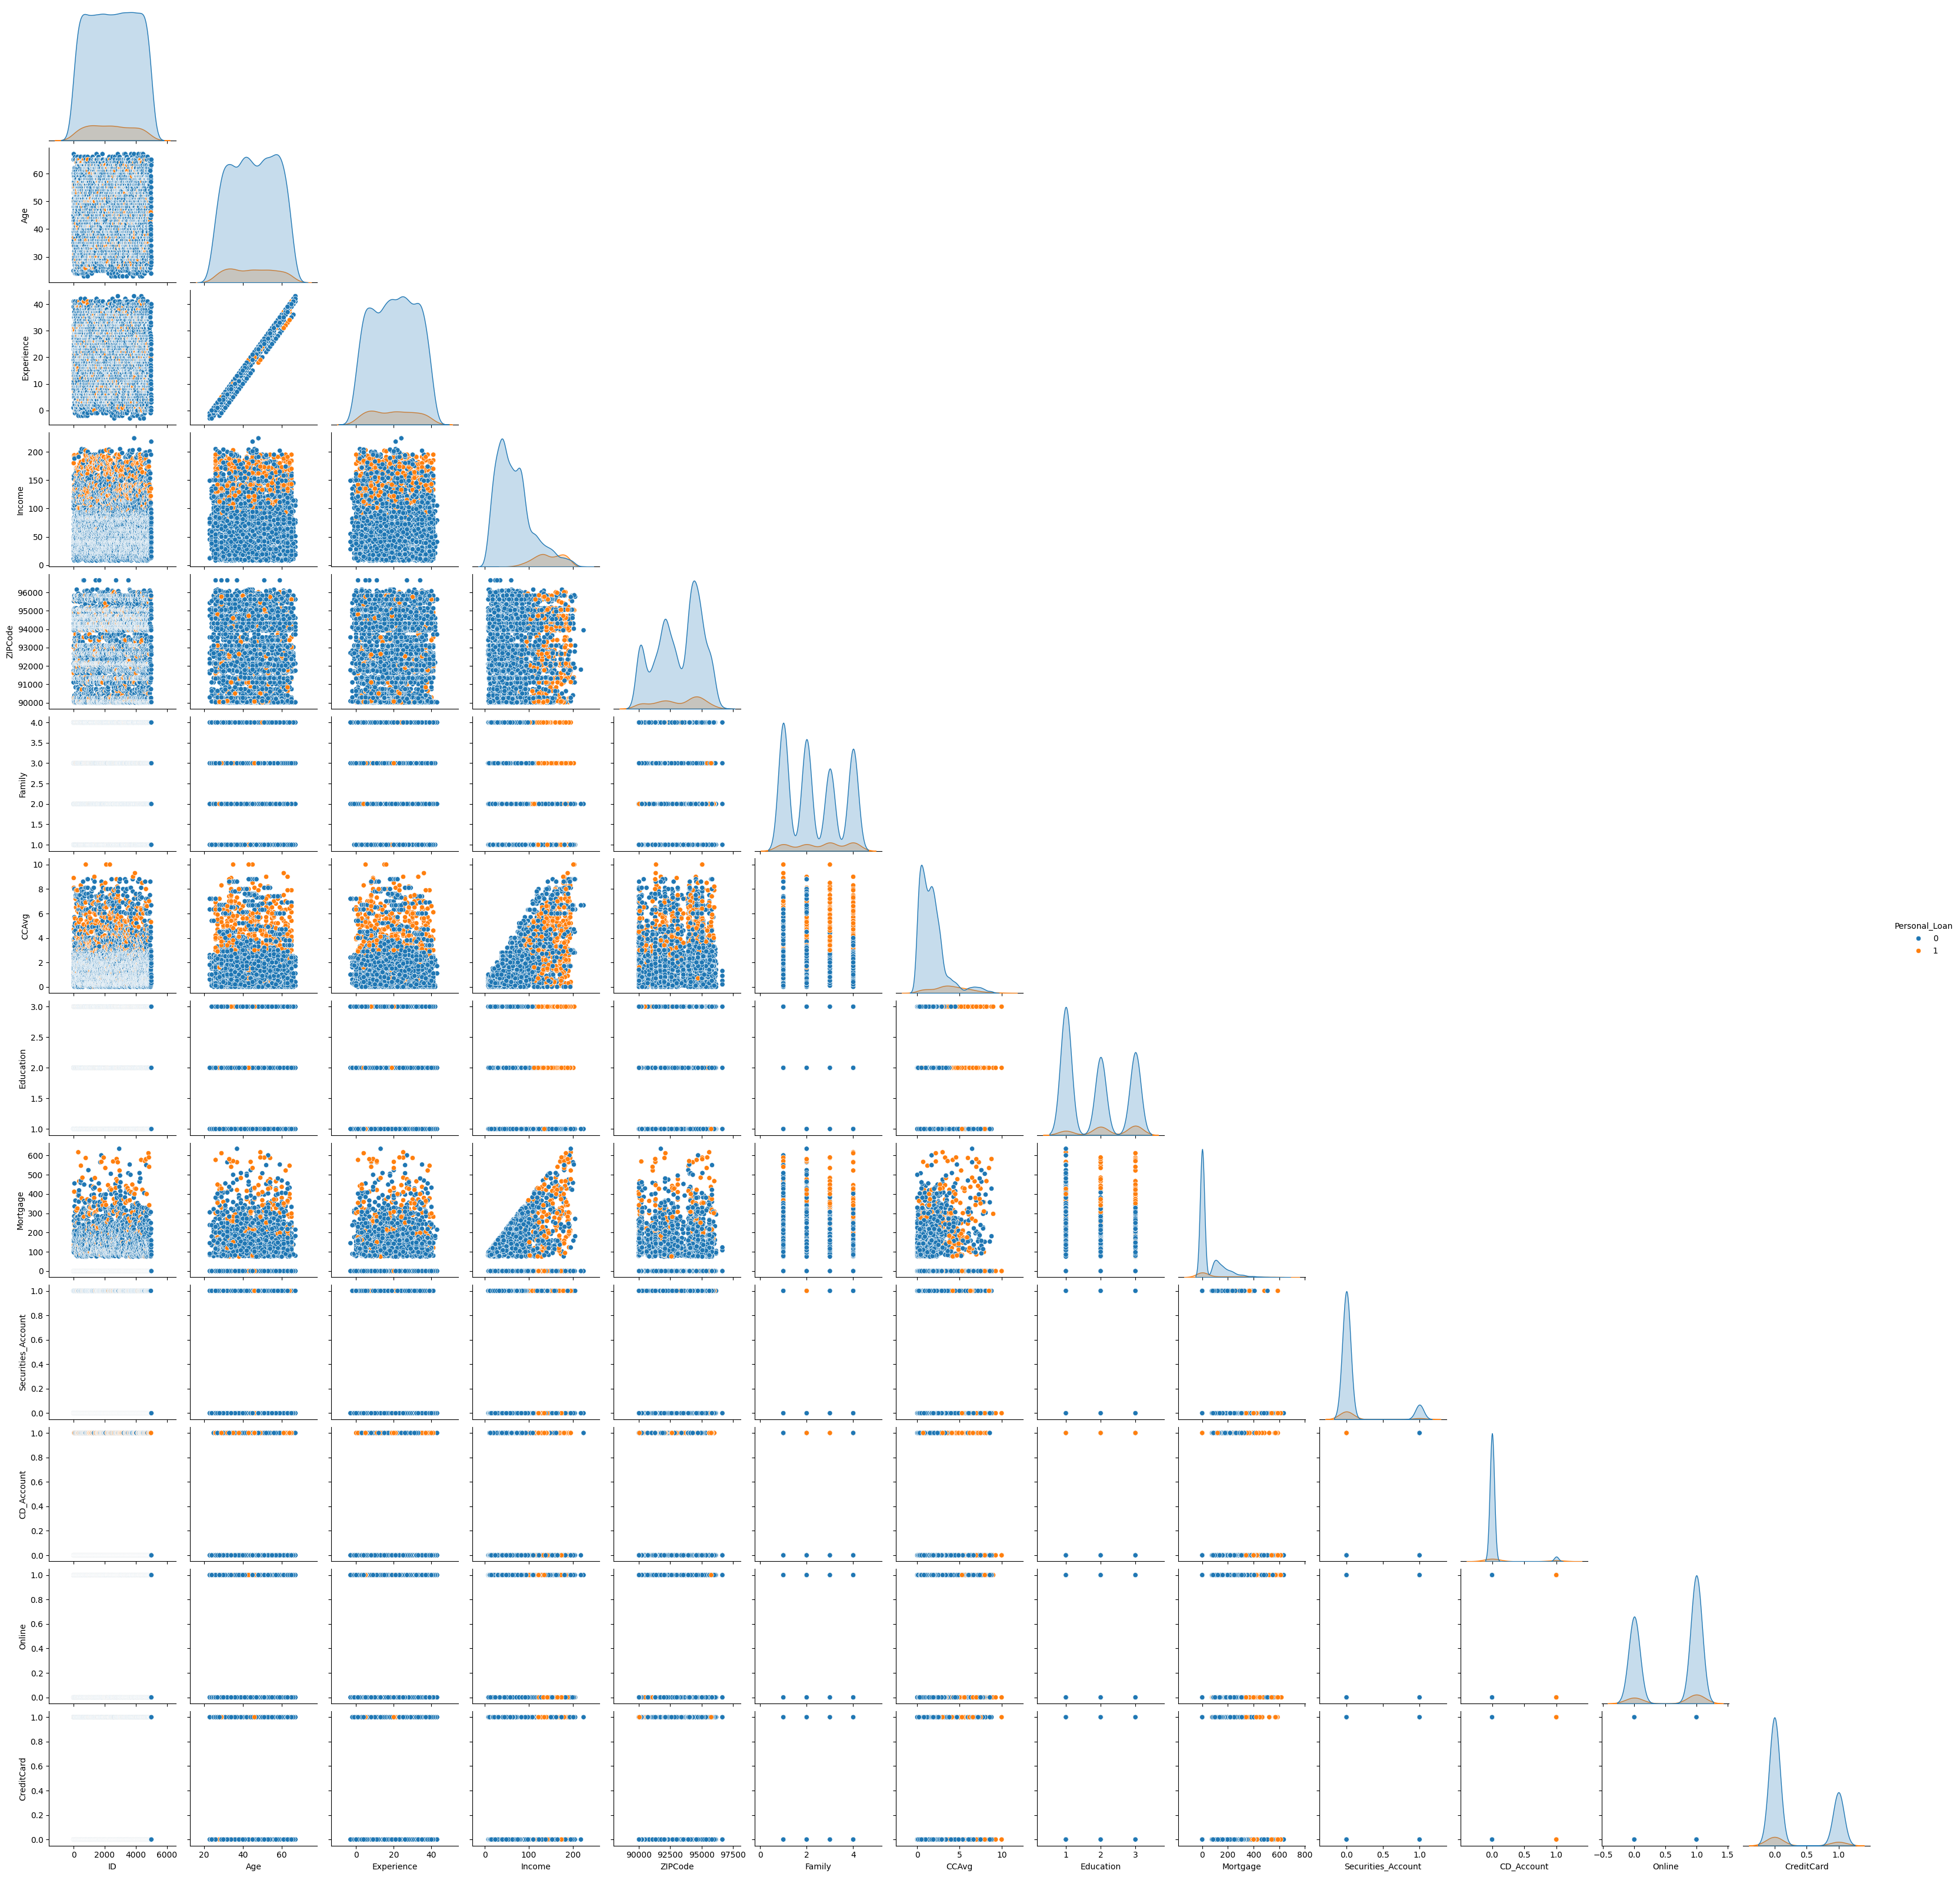

In [20]:
# Scatter plot matrix
plt.figure(figsize=(84, 84))
sns.pairplot(data,corner=True,hue="Personal_Loan")
plt.show();

* Positive Correlation observed between CCAvg and Income  
* Positive Correlation observed between Experience and Age
* Positive Correlation observed between Mortgage and Income



In [21]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

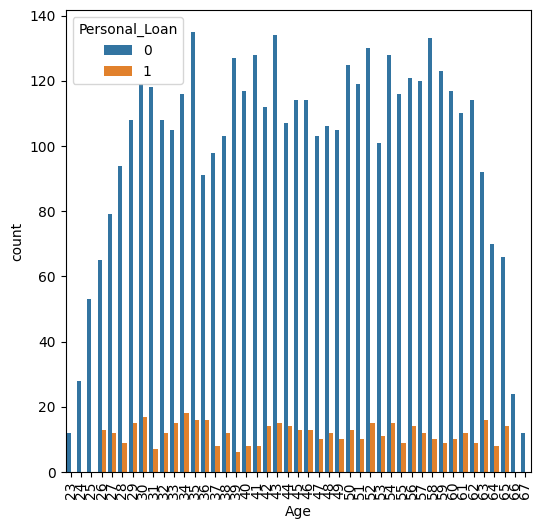

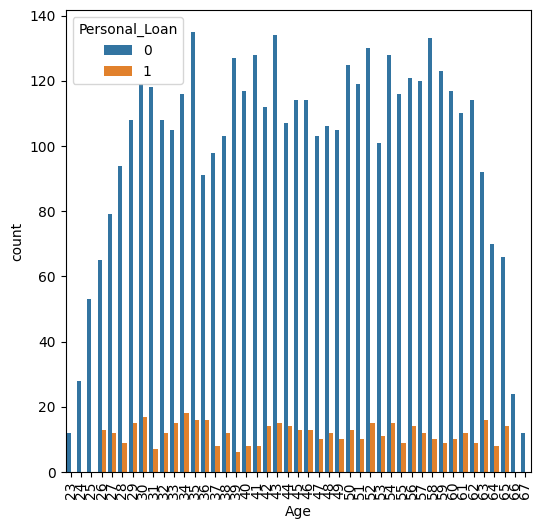

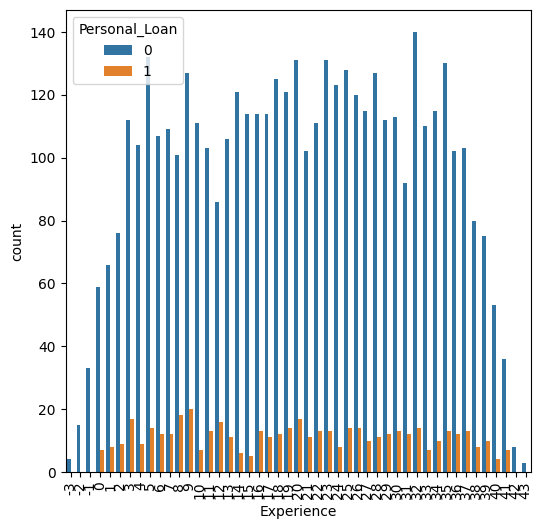

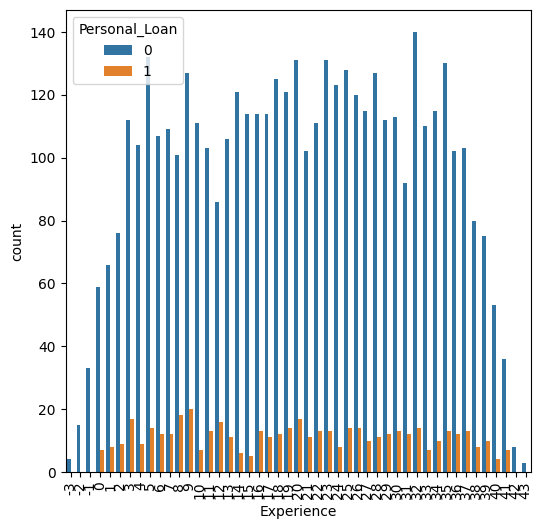

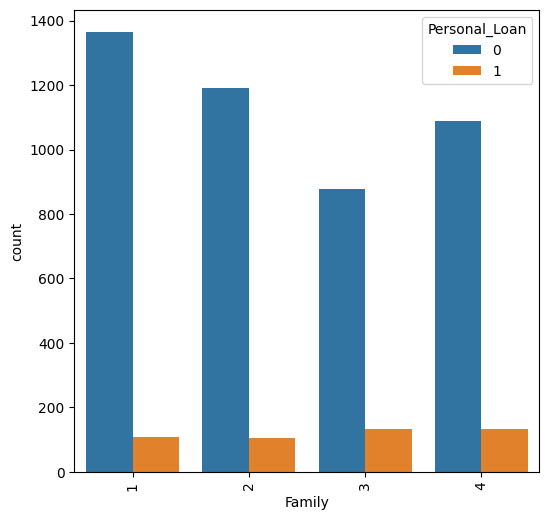

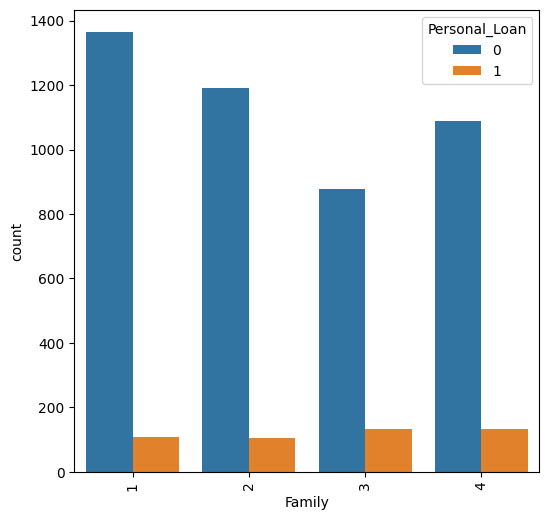

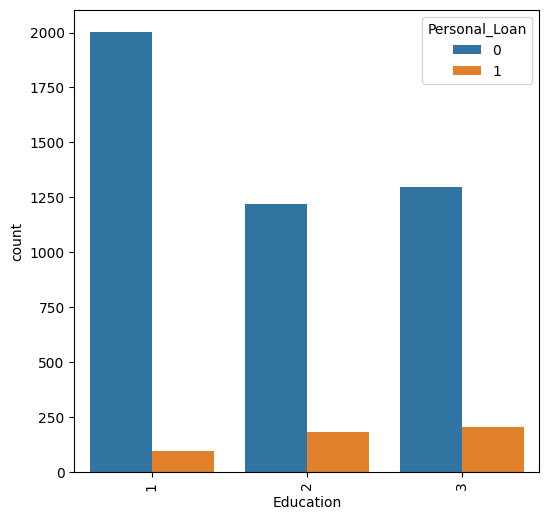

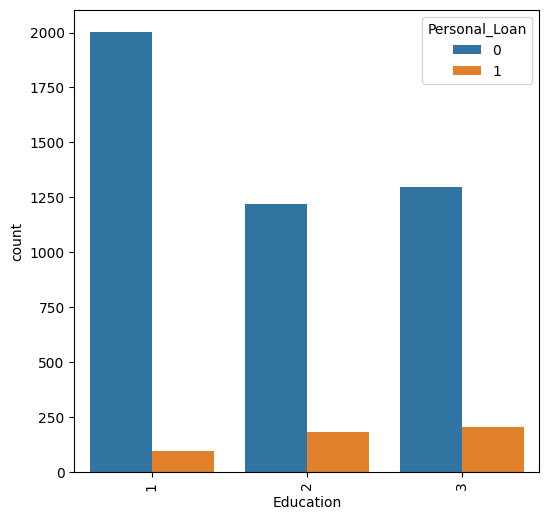

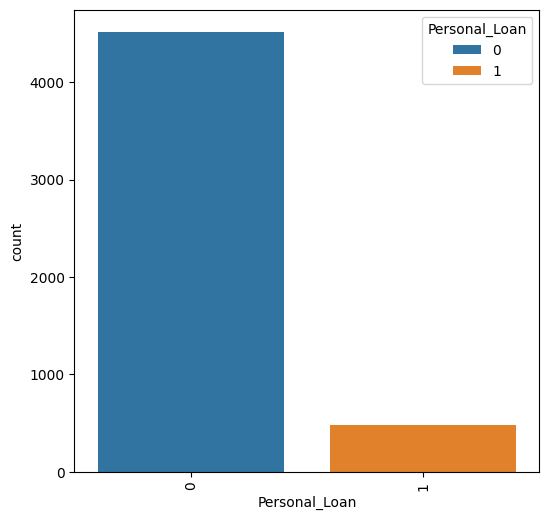

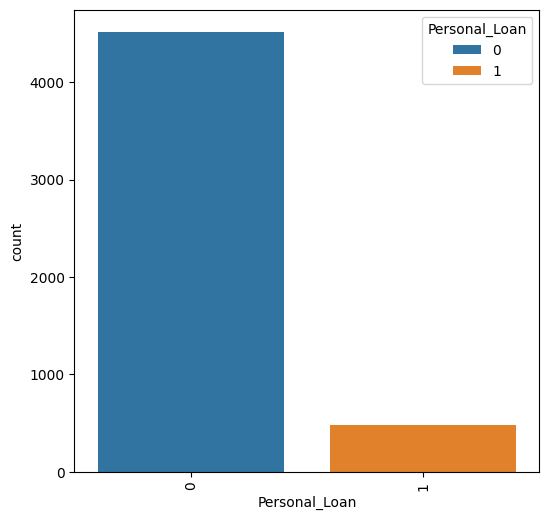

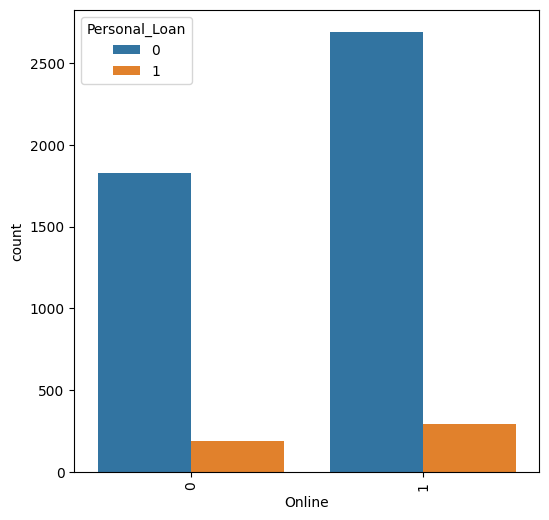

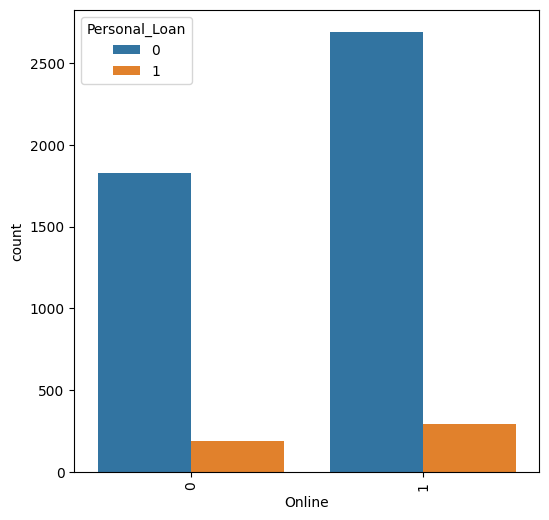

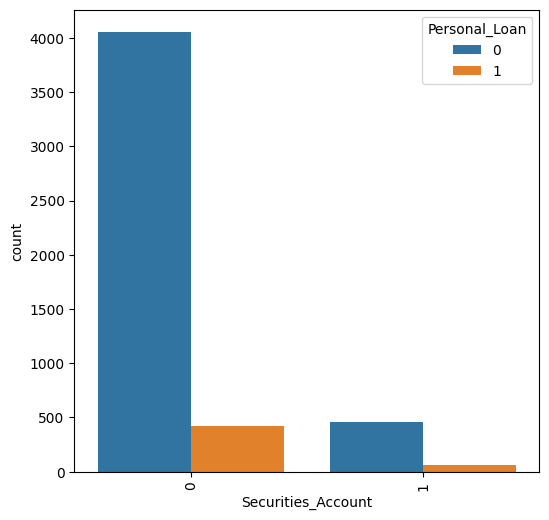

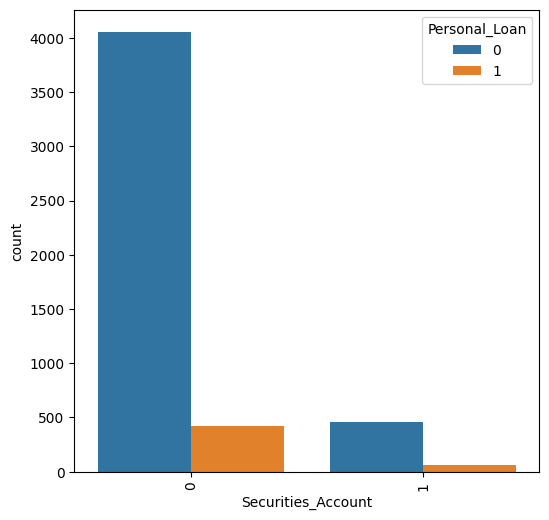

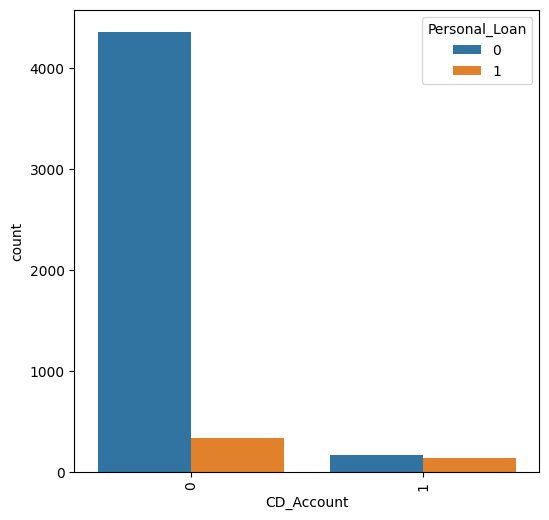

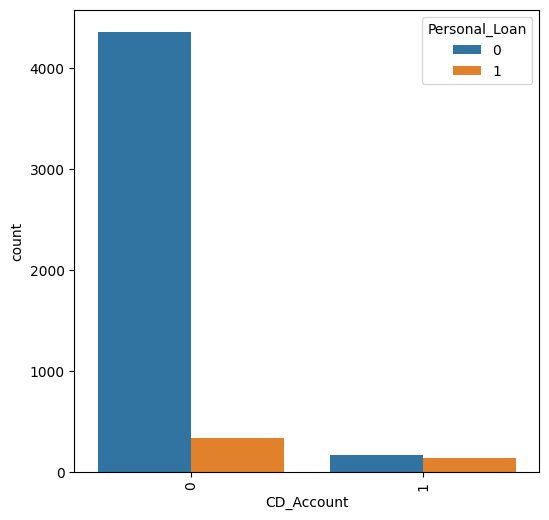

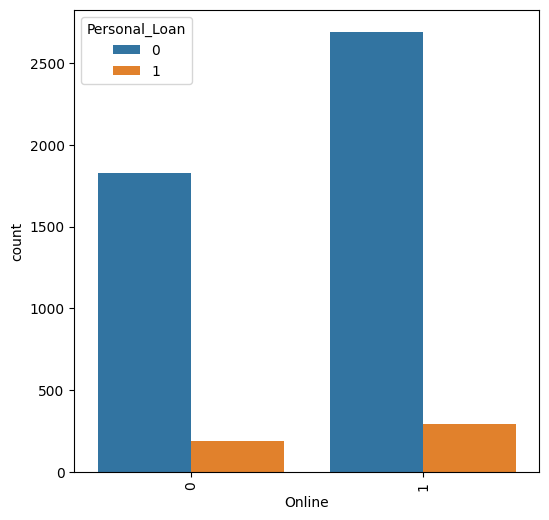

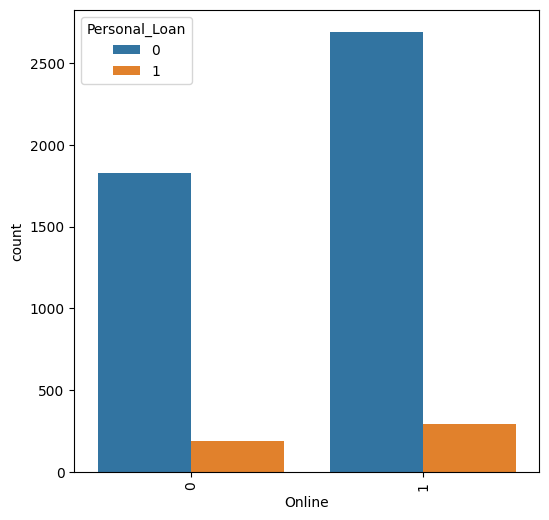

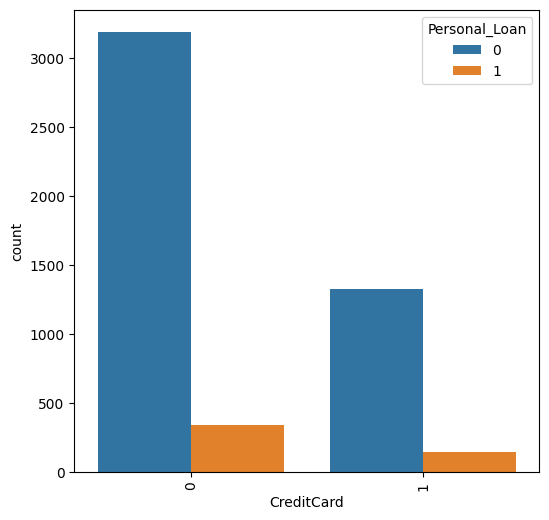

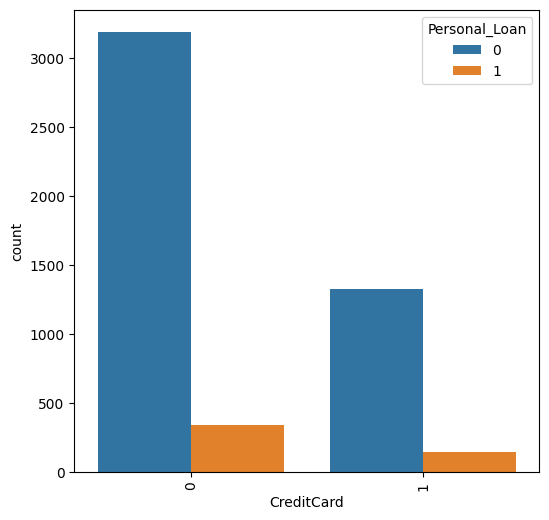

In [22]:
# let's plot the scatterplots of personal loan with all the features
l = ['Age','Experience','Family','Education','Personal_Loan','Online','Securities_Account','CD_Account','Online','CreditCard']

for i in l:
    plt.figure(figsize=(6, 6))
    plt.xticks(rotation=90)
    sns.countplot(data=data, x=i, hue="Personal_Loan")
    plt.show()
    plt.figure(figsize=(6, 6))
    plt.xticks(rotation=90)
    sns.countplot(data=data, x=i, hue="Personal_Loan")
    plt.show()

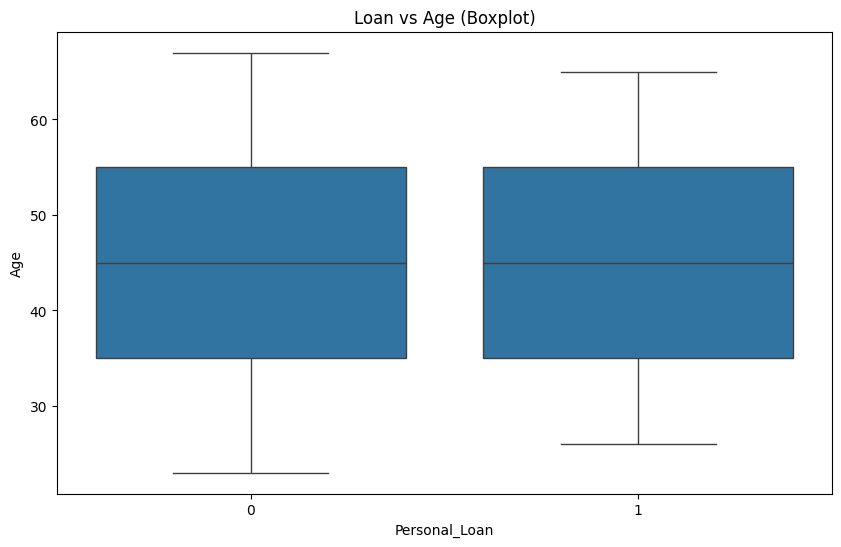

In [23]:
# Personal Loan vs Age (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Age')
plt.title('Loan vs Age (Boxplot)')
plt.show()

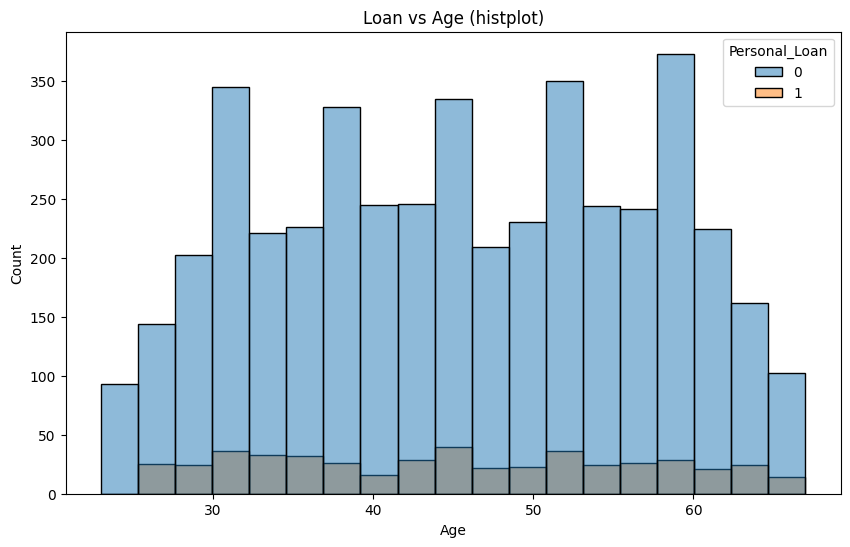

In [24]:
# Personal Loan vs Age (histplot)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Personal_Loan')
plt.title('Loan vs Age (histplot)')
plt.show()

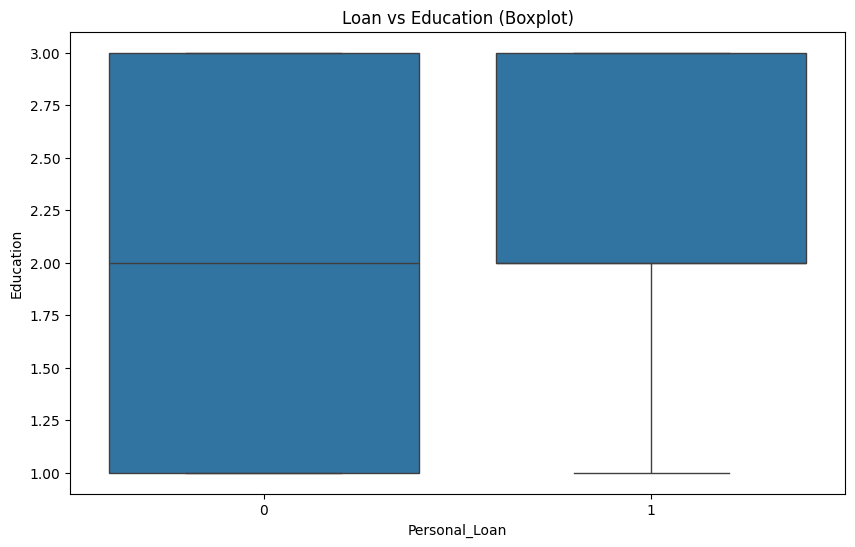

In [25]:
# Personal Loan vs Education (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Education')
plt.title('Loan vs Education (Boxplot)')
plt.show()

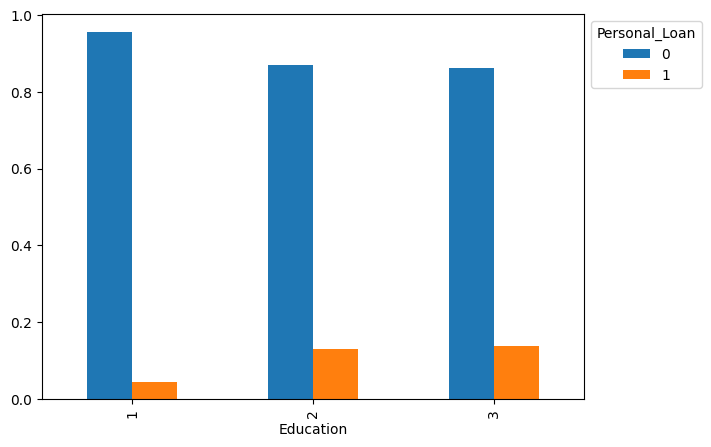

In [26]:
# creating a crosstab for Approval vs Employed
tab = pd.crosstab(
    data['Education'],
    data['Personal_Loan'],
    normalize='index'    # normalizing by dividing each row by its row total
).sort_values(by=1)    # sorting the resulting crosstab


# Plot the stacked bar chart
tab.plot(kind='bar', stacked=False, figsize=(7, 5))    # creating a stacked bar chart from the normalized crosstab
plt.xlabel('Education')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Personal_Loan');    # adding a legend for the 'Approval' column

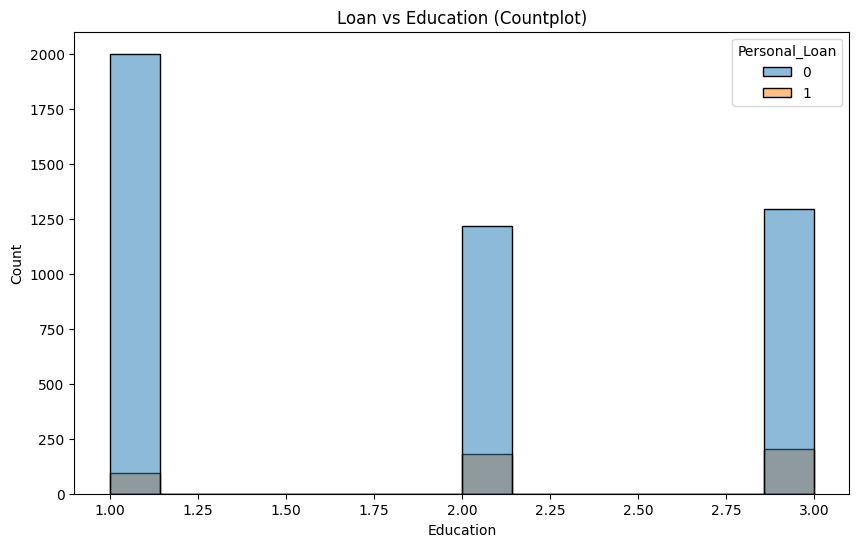

In [27]:
# Personal Loan vs Education (histplot)
plt.figure(figsize=(10, 6))
sns.histplot(data=data,x='Education', hue='Personal_Loan')
plt.title('Loan vs Education (Countplot)')
plt.show()

out of the customers having personal loan , Undergrad having the personal loan is less than the Graduate and Advanced/Professional

In [28]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

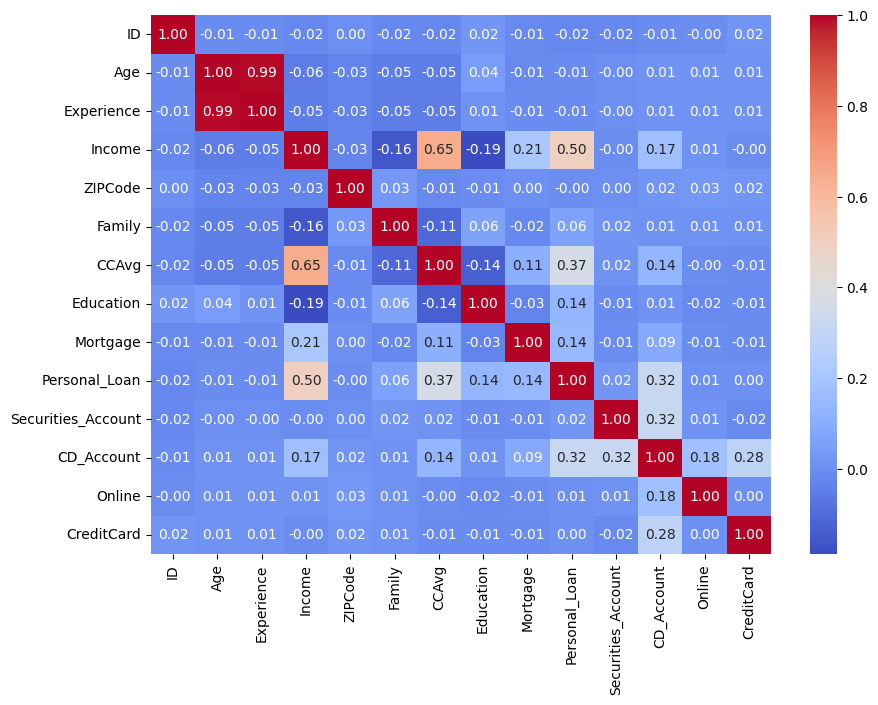

In [29]:
# defining the figure size
plt.figure(figsize=(10, 7))

# plotting the correlation heatmap
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

* Personal Loan has 0.5 highest correlation with Income
* Personal Loan has no correlation with Credit Card
* Personal loan is positively correlated with Income,CCAvg,CD_Account,Education,* Mortgage,Family,Securities account,Online
* Personal Loan is negatively correlated with ID,Age,Experience

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [30]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no missing values in the dataset.

In [31]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- As explained previously in Data Overview section we will not treat the Zipcode to find the corresponding city


In [33]:
#convert zipcode to uszipcode
from uszipcode import SearchEngine

search = SearchEngine() # set simple_zipcode=False to use rich info database

def get_zipcode_details(zipcode):
       zipcode_details = search.by_zipcode(zipcode)
       if zipcode_details is not None and zipcode_details.zipcode:  # Check if ZIP code is found
          return zipcode_details.major_city # for example, get the major city
       else:
          return None # Handle cases where ZIP code isn't found

data['City'] = data['ZIPCode'].apply(get_zipcode_details)


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [34]:
data.drop('ZIPCode', axis=1, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  City                4966 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


ZipCode is droppped and City object type is added

In [36]:
data.describe(include='all').T

count unique          top freq      mean          std  \
ID                  5000.0    NaN          NaN  NaN    2500.5  1443.520003   
Age                 5000.0    NaN          NaN  NaN   45.3384    11.463166   
Experience          5000.0    NaN          NaN  NaN   20.1046    11.467954   
Income              5000.0    NaN          NaN  NaN   73.7742    46.033729   
Family              5000.0    NaN          NaN  NaN    2.3964     1.147663   
CCAvg               5000.0    NaN          NaN  NaN  1.937938     1.747659   
Education           5000.0    NaN          NaN  NaN     1.881     0.839869   
Mortgage            5000.0    NaN          NaN  NaN   56.4988   101.713802   
Personal_Loan       5000.0    NaN          NaN  NaN     0.096     0.294621   
Securities_Account  5000.0    NaN          NaN  NaN    0.1044     0.305809   
CD_Account          5000.0    NaN          NaN  NaN    0.0604      0.23825   
Online              5000.0    NaN          NaN  NaN    0.5968     0.490589   
CreditCard          5000.0    NaN          NaN  NaN     0.294     0.455637   
City                  4966    244  Los Angeles  375       NaN          NaN   

                     min      25%     50%      75%     max  
ID                   1.0  1250.75  2500.5  3750.25  5000.0  
Age                 23.0     35.0    45.0     55.0    67.0  
Experience          -3.0     10.0    20.0     30.0    43.0  
Income               8.0     39.0    64.0     98.0   224.0  
Family               1.0      1.0     2.0      3.0     4.0  
CCAvg                0.0      0.7     1.5      2.5    10.0  
Education            1.0      1.0     2.0      3.0     3.0  
Mortgage             0.0      0.0     0.0    101.0   635.0  
Personal_Loan        0.0      0.0     0.0      0.0     1.0  
Securities_Account   0.0      0.0     0.0      0.0     1.0  
CD_Account           0.0      0.0     0.0      0.0     1.0  
Online               0.0      0.0     1.0      1.0     1.0  
CreditCard           0.0      0.0     0.0      1.0     1.0  
City                 NaN      NaN     NaN      NaN     NaN

Top City is "Los Angeles". 4966 entries has Cities in data and remaining are None. 244 unique cities.

In [37]:
data['City'].isna().sum()

34

34 entries have "None" values in City

In [38]:
#Display data with "None" Zipcodes
narows = data[data['City'].isna()]
print(narows)

        ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
106    107   43          17      69       4   2.90          1         0   
172    173   38          13     171       2   7.80          1         0   
184    185   52          26      63       2   1.50          2         0   
321    322   44          20     101       3   4.40          2        82   
366    367   50          24      35       1   0.30          3         0   
384    385   51          25      21       4   0.60          3         0   
468    469   34          10      21       1   0.50          3         0   
476    477   60          34      53       1   0.80          2         0   
630    631   32           7      35       3   1.30          1       108   
672    673   51          27      23       1   0.20          1         0   
695    696   29           4     115       1   1.90          1         0   
721    722   49          24      39       1   1.40          3         0   
780    781   32          

view of the City data with None values

In [39]:
#Creating a "Missing" Category instead of removing the NONE(missing cities)
#data['City'].fillna('Missing', inplace=True)
data.fillna({'City':'Missing'},inplace= True)

In [40]:
data['City'].isna().sum()

0

There are no "None" values in City after replacing with "Missing"

In [41]:
#Personal Loan Vs City : Commented displaying 244 graphs
#for i in data['City'].unique():
#  plt.figure(figsize=(10, 6))
#  sns.countplot(data=data[data['City'] == i], x='Personal_Loan',label=i)
#  plt.show()

In [42]:
#Personal Loan Vs City
count_no_personal_loan = 0
count_max_personal_loan = 0

city_with_no_personal_loan = ['']
count_with_max_no_personal_loan = 0
city_with_max_personal_loan = ''


for i in data['City'].unique():
  #print("**",i,"**")
  #print(data[data['City'] == i]['Personal_Loan'].value_counts())
  if data[data['City'] == i]['Personal_Loan'].value_counts().get(0,0) > count_with_max_no_personal_loan :
    city_with_max_no_personal_loan =i
    count_with_max_no_personal_loan = data[data['City'] == i]['Personal_Loan'].value_counts().get(0,0)
  if data[data['City'] == i]['Personal_Loan'].value_counts().get(1,0) ==0 :
    city_with_no_personal_loan.append(i)
  if data[data['City'] == i]['Personal_Loan'].value_counts().get(1,0) > count_max_personal_loan :
    city_with_max_personal_loan =i
    count_max_personal_loan = data[data['City'] == i]['Personal_Loan'].value_counts().get(1,0)

print("City with no personal loan:",city_with_no_personal_loan)
print("City with max personal loan:",city_with_max_personal_loan,"With Count:",count_max_personal_loan)
print("City with Max no personal loan customers:",city_with_max_no_personal_loan,"With Count:",count_with_max_no_personal_loan)

City with no personal loan: ['', 'Glendora', 'Daly City', 'Mountain View', 'Redlands', 'Brisbane', 'Salinas', 'Rancho Cucamonga', 'Santa Ana', 'Loma Linda', 'Encinitas', 'Agoura Hills', 'Rosemead', 'Albany', 'Edwards', 'San Leandro', 'Mission Hills', 'South Lake Tahoe', 'Porter Ranch', 'Anaheim', 'Mission Viejo', 'Bodega Bay', 'Hollister', 'San Pablo', 'La Palma', 'Garden Grove', 'Lompoc', 'Manhattan Beach', 'Folsom', 'Sanger', 'Carson', 'Escondido', 'Highland', 'Ukiah', 'Chino Hills', 'Antioch', 'Orange', 'Hacienda Heights', 'Baldwin Park', 'Sylmar', 'Tustin', 'March Air Reserve Base', 'Concord', 'San Juan Bautista', 'Laguna Hills', 'Citrus Heights', 'Imperial', 'Monterey Park', 'Montague', 'South Pasadena', 'Merced', 'National City', 'Simi Valley', 'Sunland', 'Trinity Center', 'San Bruno', 'Larkspur', 'Crestline', 'La Mirada', 'Clovis', 'Yorba Linda', 'Los Alamitos', 'Aptos', 'Montclair', 'Westlake Village', 'Yucaipa', 'Palos Verdes Peninsula', 'Half Moon Bay', 'Oxnard', 'North Hills

Los Angeles is top city with personal loan customers and is also top city with customers not having personal loan.

**Data Preparation for modelling**

In [43]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
label_encoder.fit(data['City'])
data['City'] = label_encoder.transform(data['City'])

Label Encoding City attribute

In [44]:
data.head()

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       4    1.6          1         0   
1   2   45          19      34       3    1.5          1         0   
2   3   39          15      11       1    1.0          1         0   
3   4   35           9     100       1    2.7          2         0   
4   5   35           8      45       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  City  
0              0                   1           0       0           0   148  
1              0                   1           0       0           0   106  
2              0                   0           0       0           0    17  
3              0                   0           0       0           0   179  
4              0                   0           0       0           1   135

Top 5 data . City Values are encoded

In [45]:
# defining the explanatory (independent) and response (dependent) variables
X = data.drop('Personal_Loan', axis=1)
y = data['Personal_Loan']

Display top 5 Independent Variables

In [46]:
X.head()

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       4    1.6          1         0   
1   2   45          19      34       3    1.5          1         0   
2   3   39          15      11       1    1.0          1         0   
3   4   35           9     100       1    2.7          2         0   
4   5   35           8      45       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  City  
0                   1           0       0           0   148  
1                   1           0       0           0   106  
2                   0           0       0           0    17  
3                   0           0       0           0   179  
4                   0           0       0           1   135

Top 5 - Personal Loan data Dependent Variable

In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [48]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

In [49]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (4000, 13)
Shape of test set: (1000, 13) 

Percentage of classes in training set:
0    90.625
1     9.375
Name: Personal_Loan, dtype: float64 

Percentage of classes in test set:
0    89.5
1    10.5
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

Predicting a customer will not buy personal loan but in reality, the customer will buy personal loan (FN)
Predicting a customer will buy personal loan but in reality, the customer will not buy personal loan (FP)

**Which case is more important?**

If the model predicts that a customer will buy personal loan but in reality, the customer will not buy is an important case to focus on since there are attributes that are similar to the attributes to the customer converted(bought loans) in the past.
False positive is more important to focus on in the next campaign and to minimise to avoid wasted marketing efforts.

If the model predict that a customer will not buy personal loan but in reality, the customer buys , this category is less important as the customer already has bought loans.



**How to reduce the losses?**
Precision is the better metrics to be used
The bank would want the precision to be maximized, greater the precision score higher are the chances of minimizing the False Positives.


First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearn function will be used to plot confusion matrix

In [50]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [51]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Note**: We want to maximize the Precision Score to ensure that we reduce the chances of False Positives.

Predicting a customer will buy personal loan but in reality, the customer will not buy personal loan is False Positive situation.

### Model Building

### Decision Tree (default)

In [52]:
# creating an instance of the decision tree model
model = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)


#####**Checking model performance on training set**

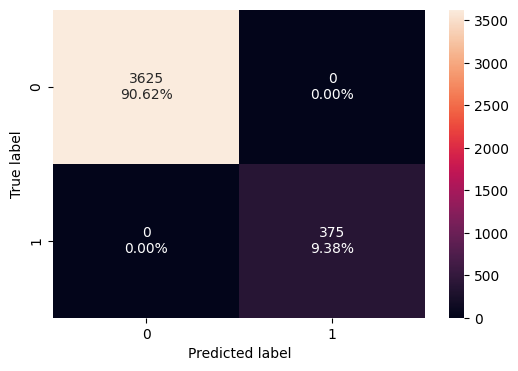

In [53]:
#Create Confusion Matrix
confusion_matrix_sklearn(model, X_train, y_train)

In [54]:
# predicting using the independent variables
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_default_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#####**Checking model performance on test set**

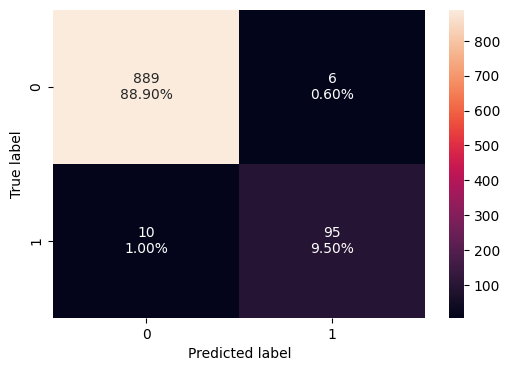

In [55]:
#Create Confusion Matrix
confusion_matrix_sklearn(model, X_test, y_test)

In [56]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_default_perf_test

Accuracy    Recall  Precision       F1
0     0.984  0.904762   0.940594  0.92233

* Model is giving good and generalized results on training and test set.

#####**Visualizing the Decision Tree**

In [57]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'City']


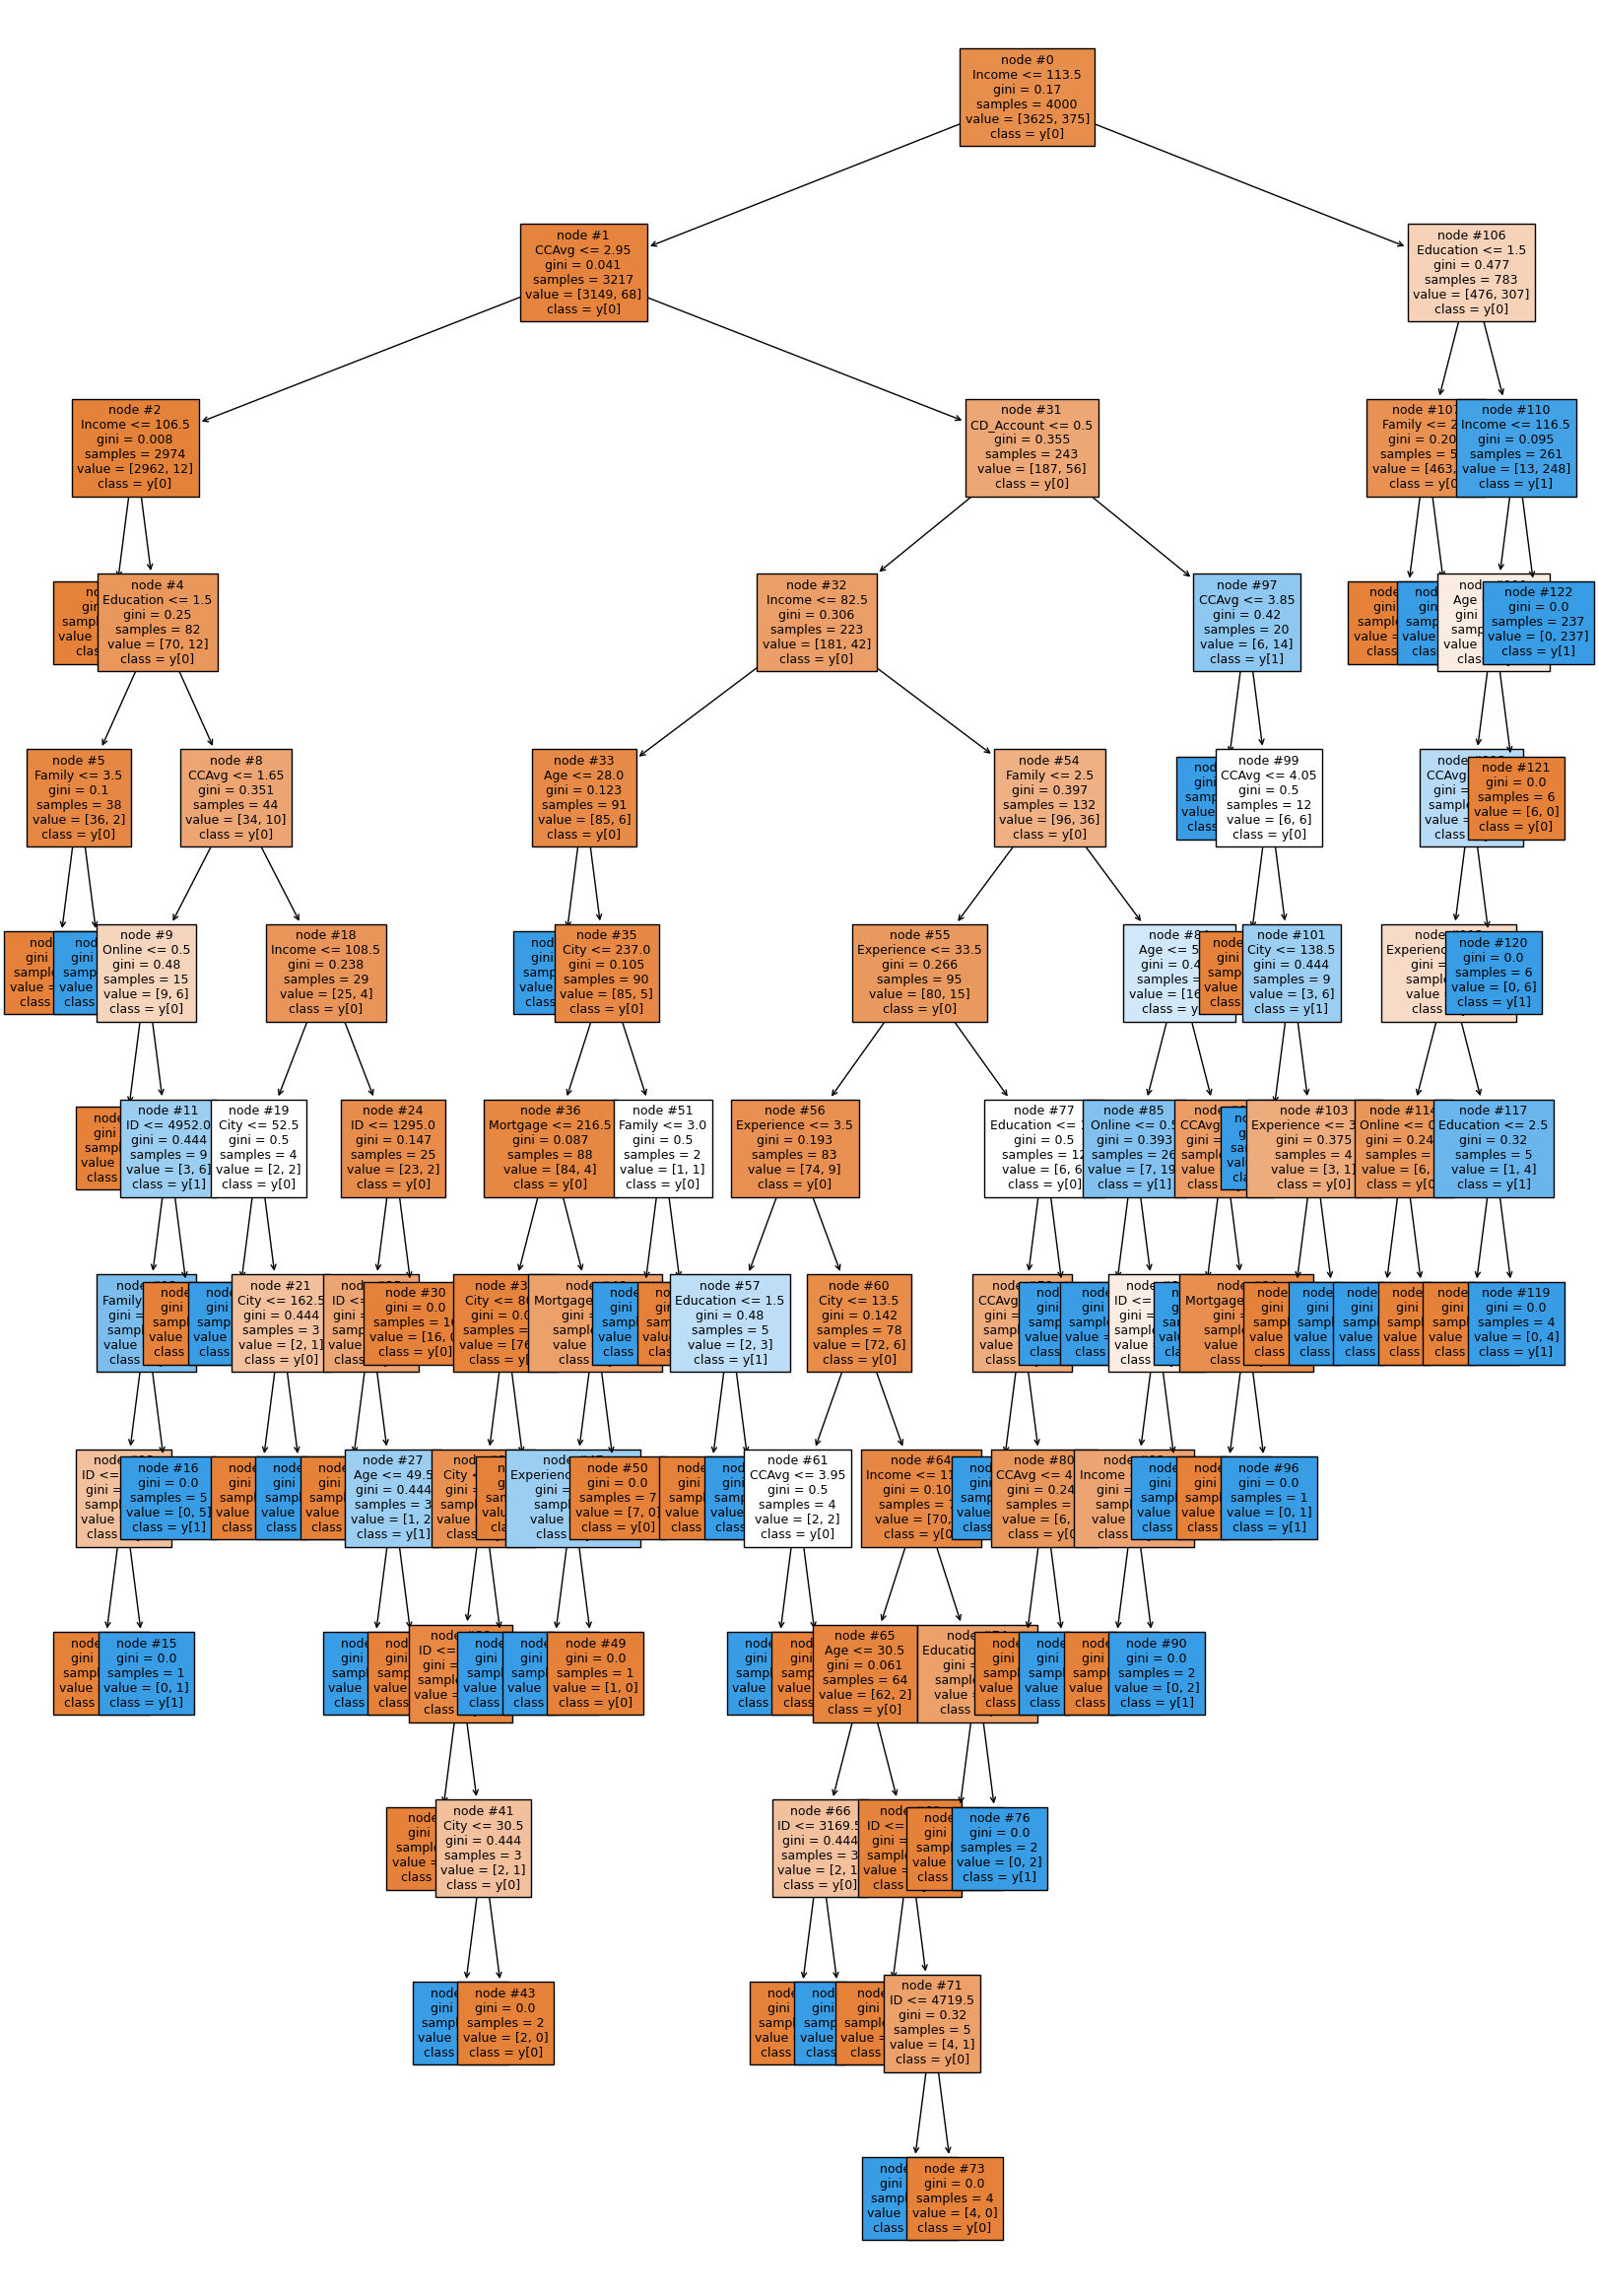

In [58]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- We can observe that this is also a very complex tree.

In [59]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [36.00, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- CCAvg <= 1.65
|   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |--- ID <= 4952.00
|   |   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |   |--- ID <= 2337.00
|   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- ID >  2337.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |   |

#####**Feature Importances**

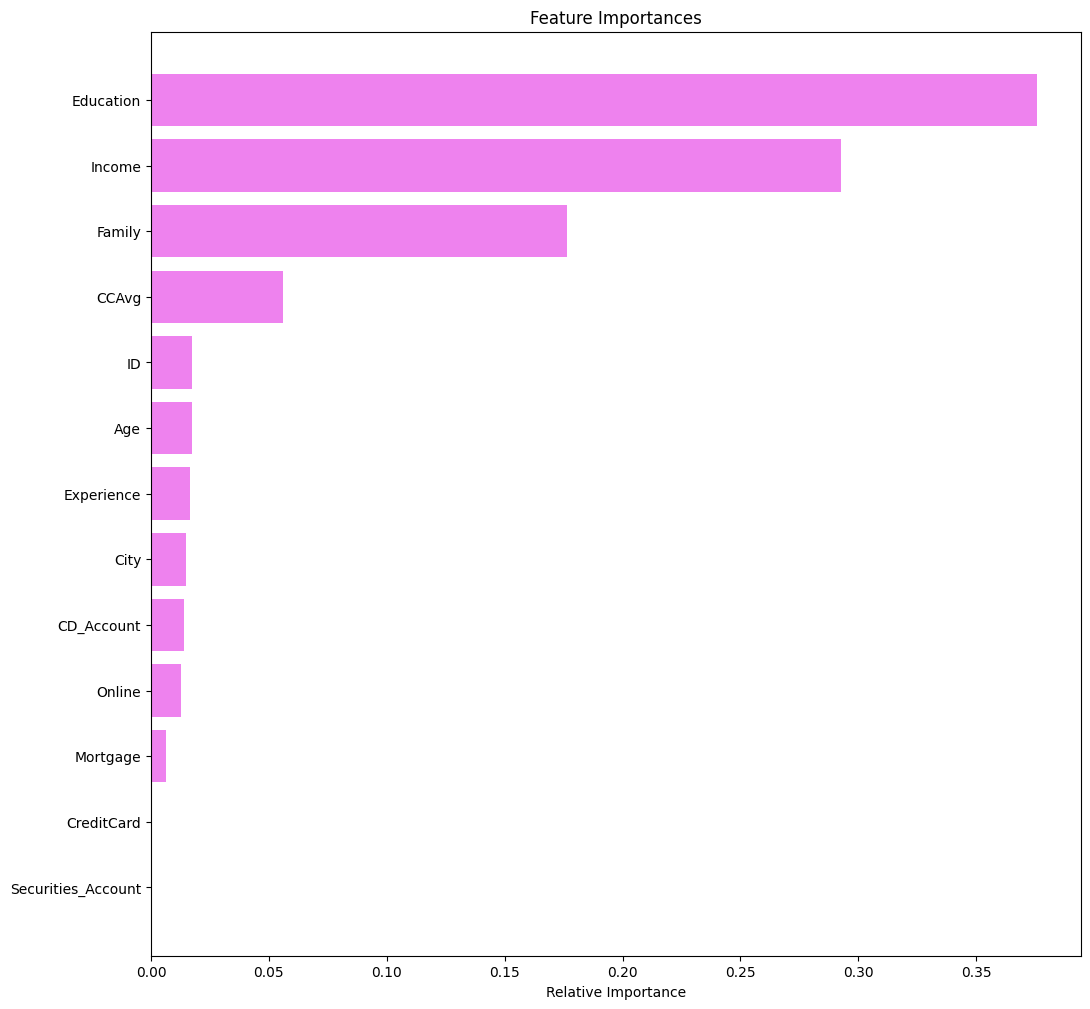

In [60]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education,Income,and Family are the top 3 important features

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier


#####**Checking model performance on training set**

In [61]:
model1 = DecisionTreeClassifier(random_state=42, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

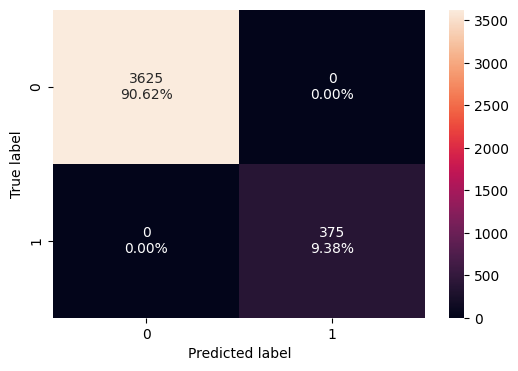

In [62]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [63]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#####**Checking model performance on test set**

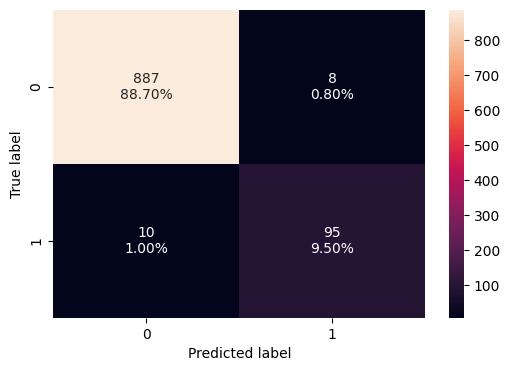

In [64]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [65]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0     0.982  0.904762    0.92233  0.913462

There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

#####**Visualizing the Decision Tree**

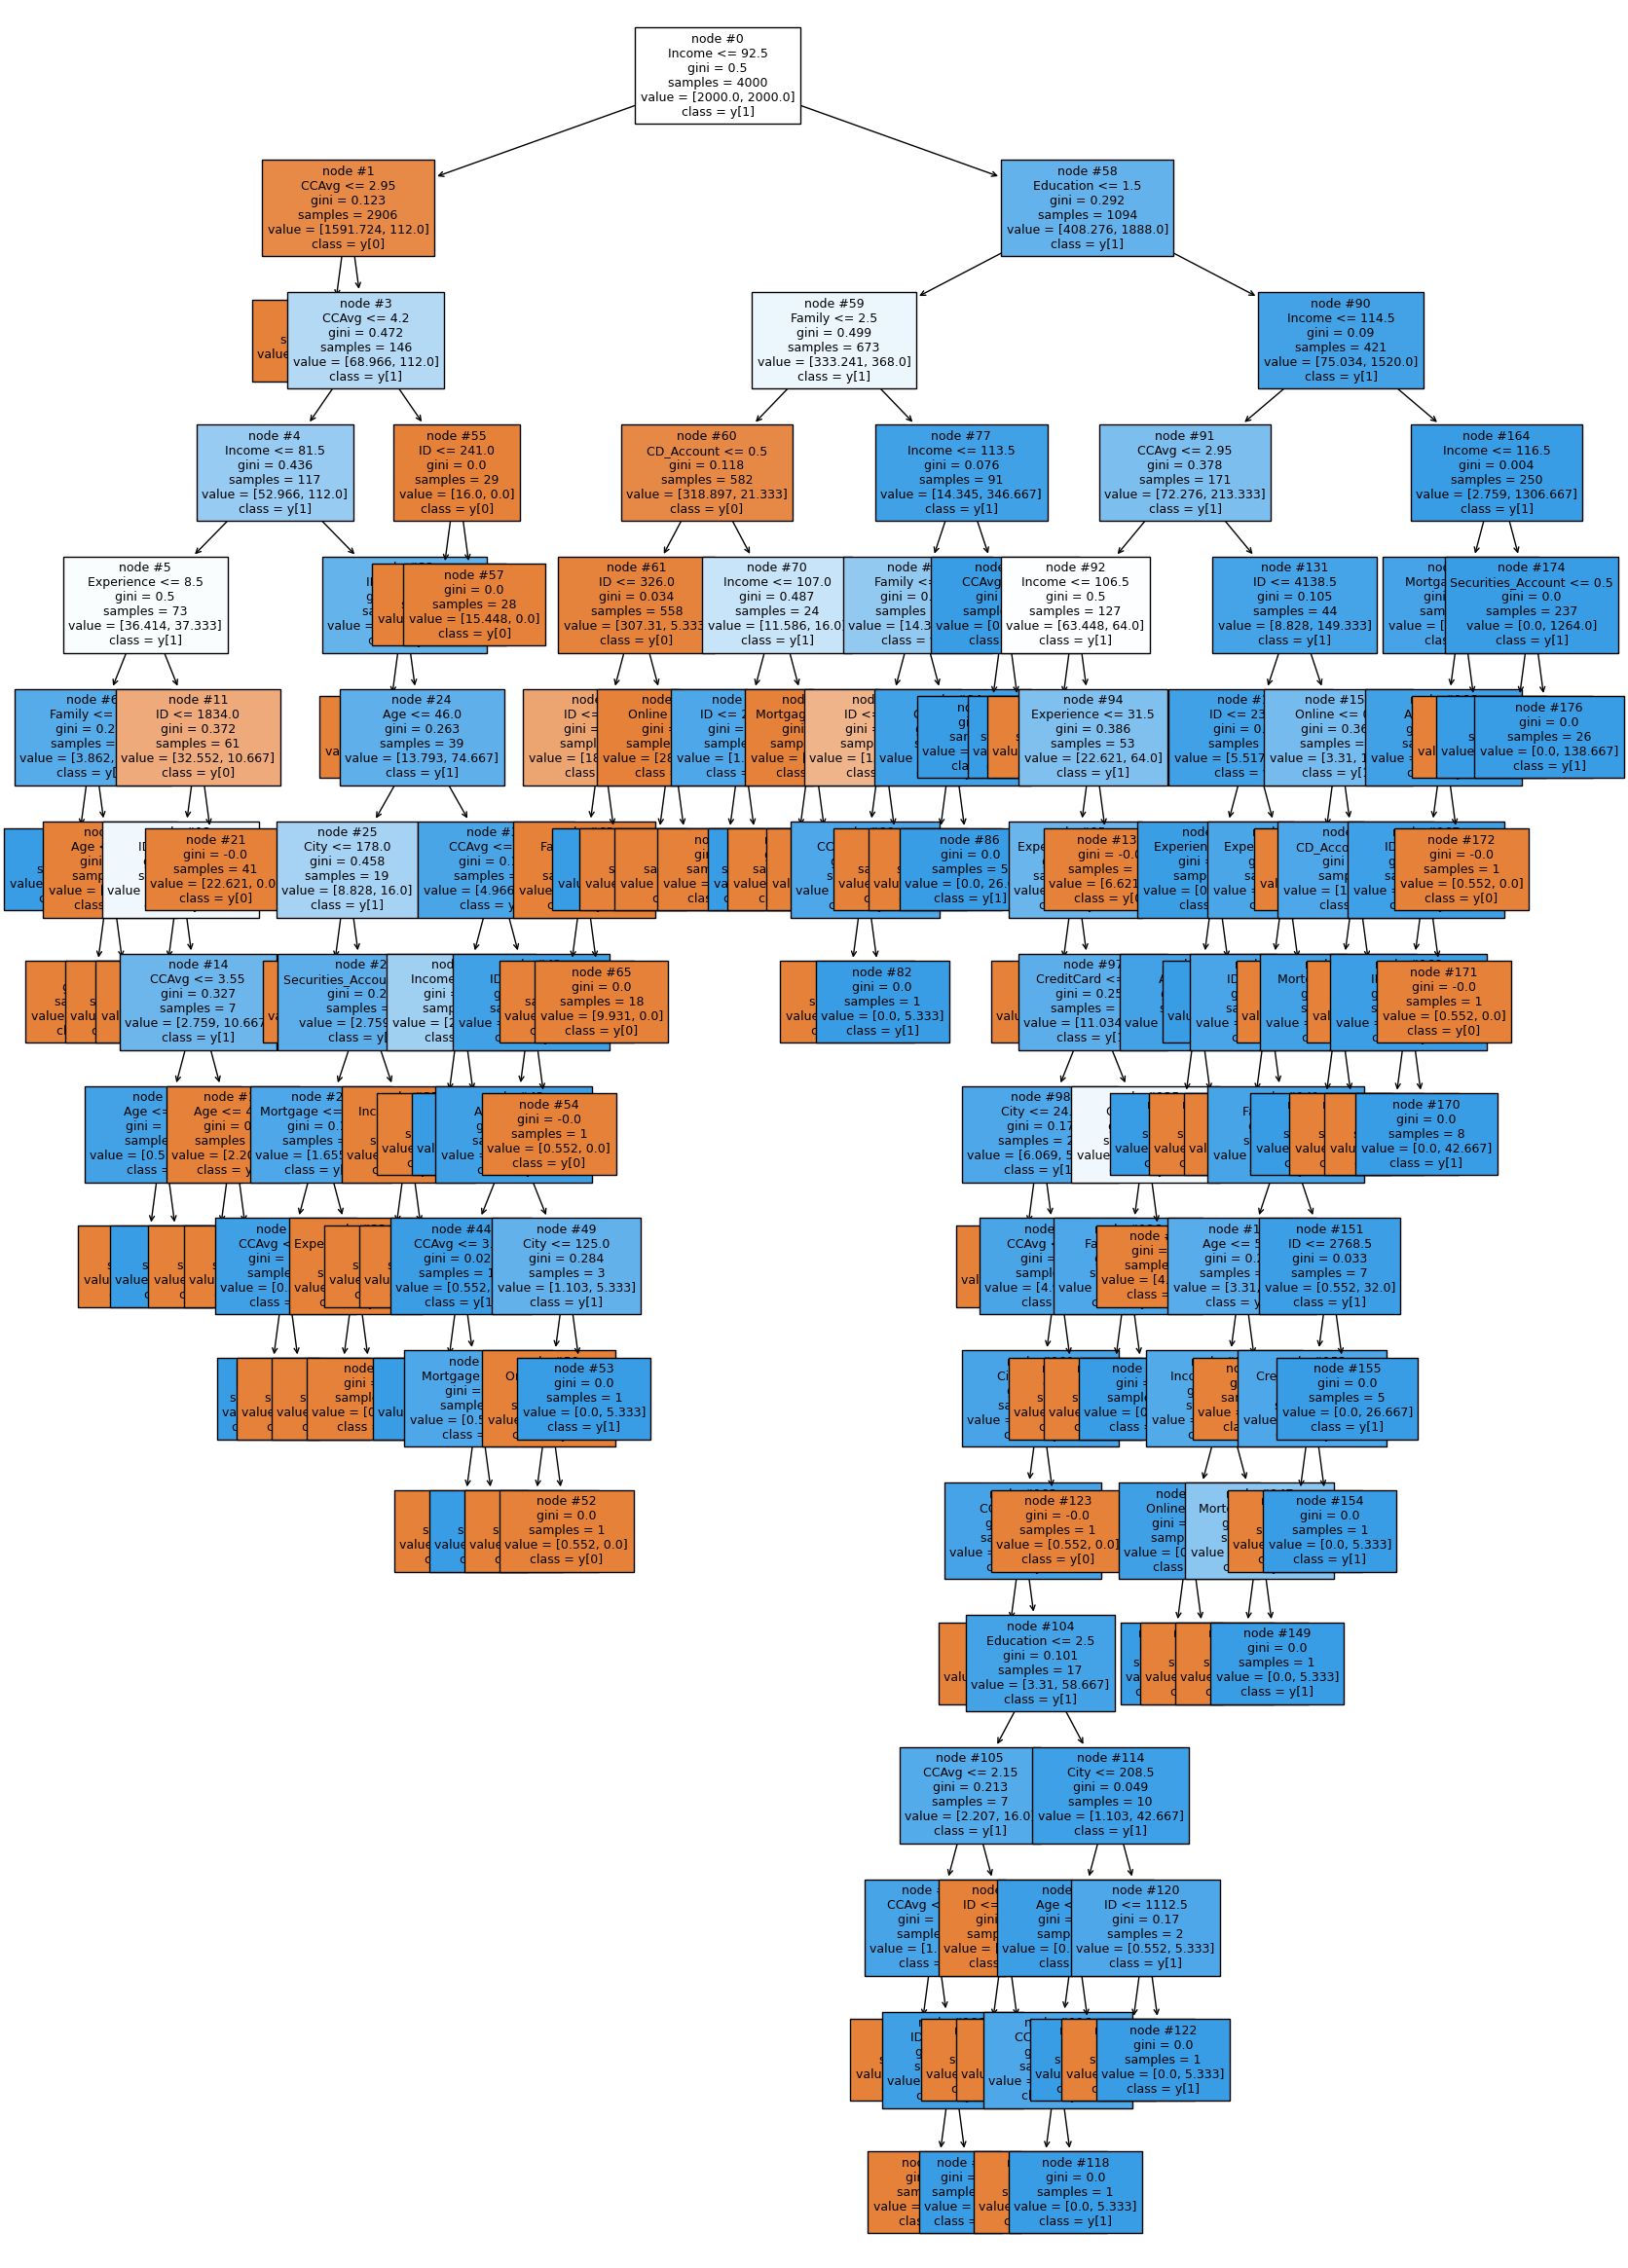

In [66]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- We can observe that this is also a very complex tree.

In [67]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1522.76, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.20
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 26.67] class: 1
|   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |--- Age <= 30.50
|   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  30.50
|   |   |   |   |   |   |   |--- weights: [3.31, 0.00] class: 0
|   |   |   |   |--- Experience >  8.50
|   |   |   |   |   |--- ID <= 1834.00
|   |   |   |   |   |   |--- ID <= 1030.50
|   |   |   |   |   |   |   |--- weights: [7.17, 0.00] class: 0
|   |   |   |   |   |   |--- ID >  1030.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |   |   |--- Age <= 42.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |   |   |   |   |--

#####**Feature Importances**

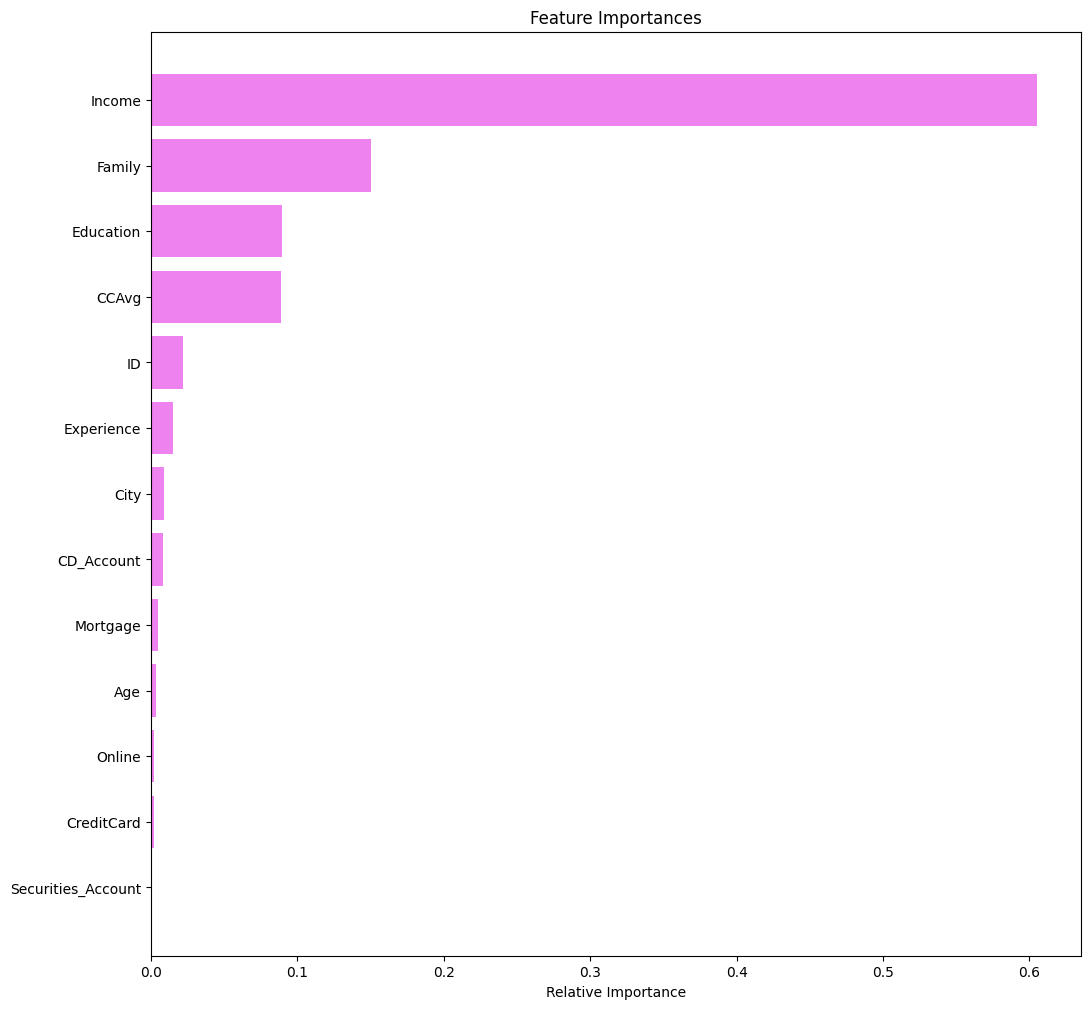

In [68]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income,Family and Education are the top 3 important features

## Model Performance Improvement

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (precision score).

Precision Score Model:Since we want to minimize false positives (predicting a customer will buy a loan when they won't), precision should be our primary evaluation metric. We can also monitor the FPR(False Positive Rate) to track the rate of false positives directly.

In [69]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate precision scores for training and test sets
            train_precision_score = precision_score(y_train, y_train_pred)
            test_precision_score = precision_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test precision scores
            score_diff = abs(train_precision_score - test_precision_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_precision_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_precision_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test precision score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 50
Min samples split: 10
Best test precision score: 0.796875


#####**Checking model performance on training set**

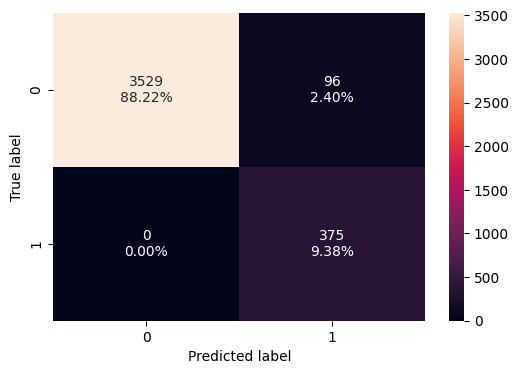

In [70]:
# creating an instance of the best model - precision score
model2 = best_estimator

confusion_matrix_sklearn(model2, X_train, y_train)

In [71]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision        F1
0     0.976     1.0   0.796178  0.886525

#####**Checking model performance on test set**

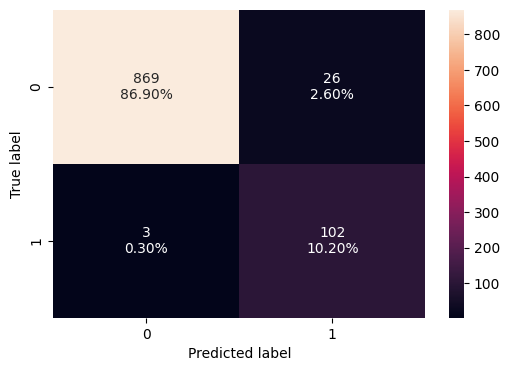

In [72]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [73]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0     0.971  0.971429   0.796875  0.875536

- The training and test scores are very close to each other, indicating a generalized performance

#### Visualizing the Decision Tree

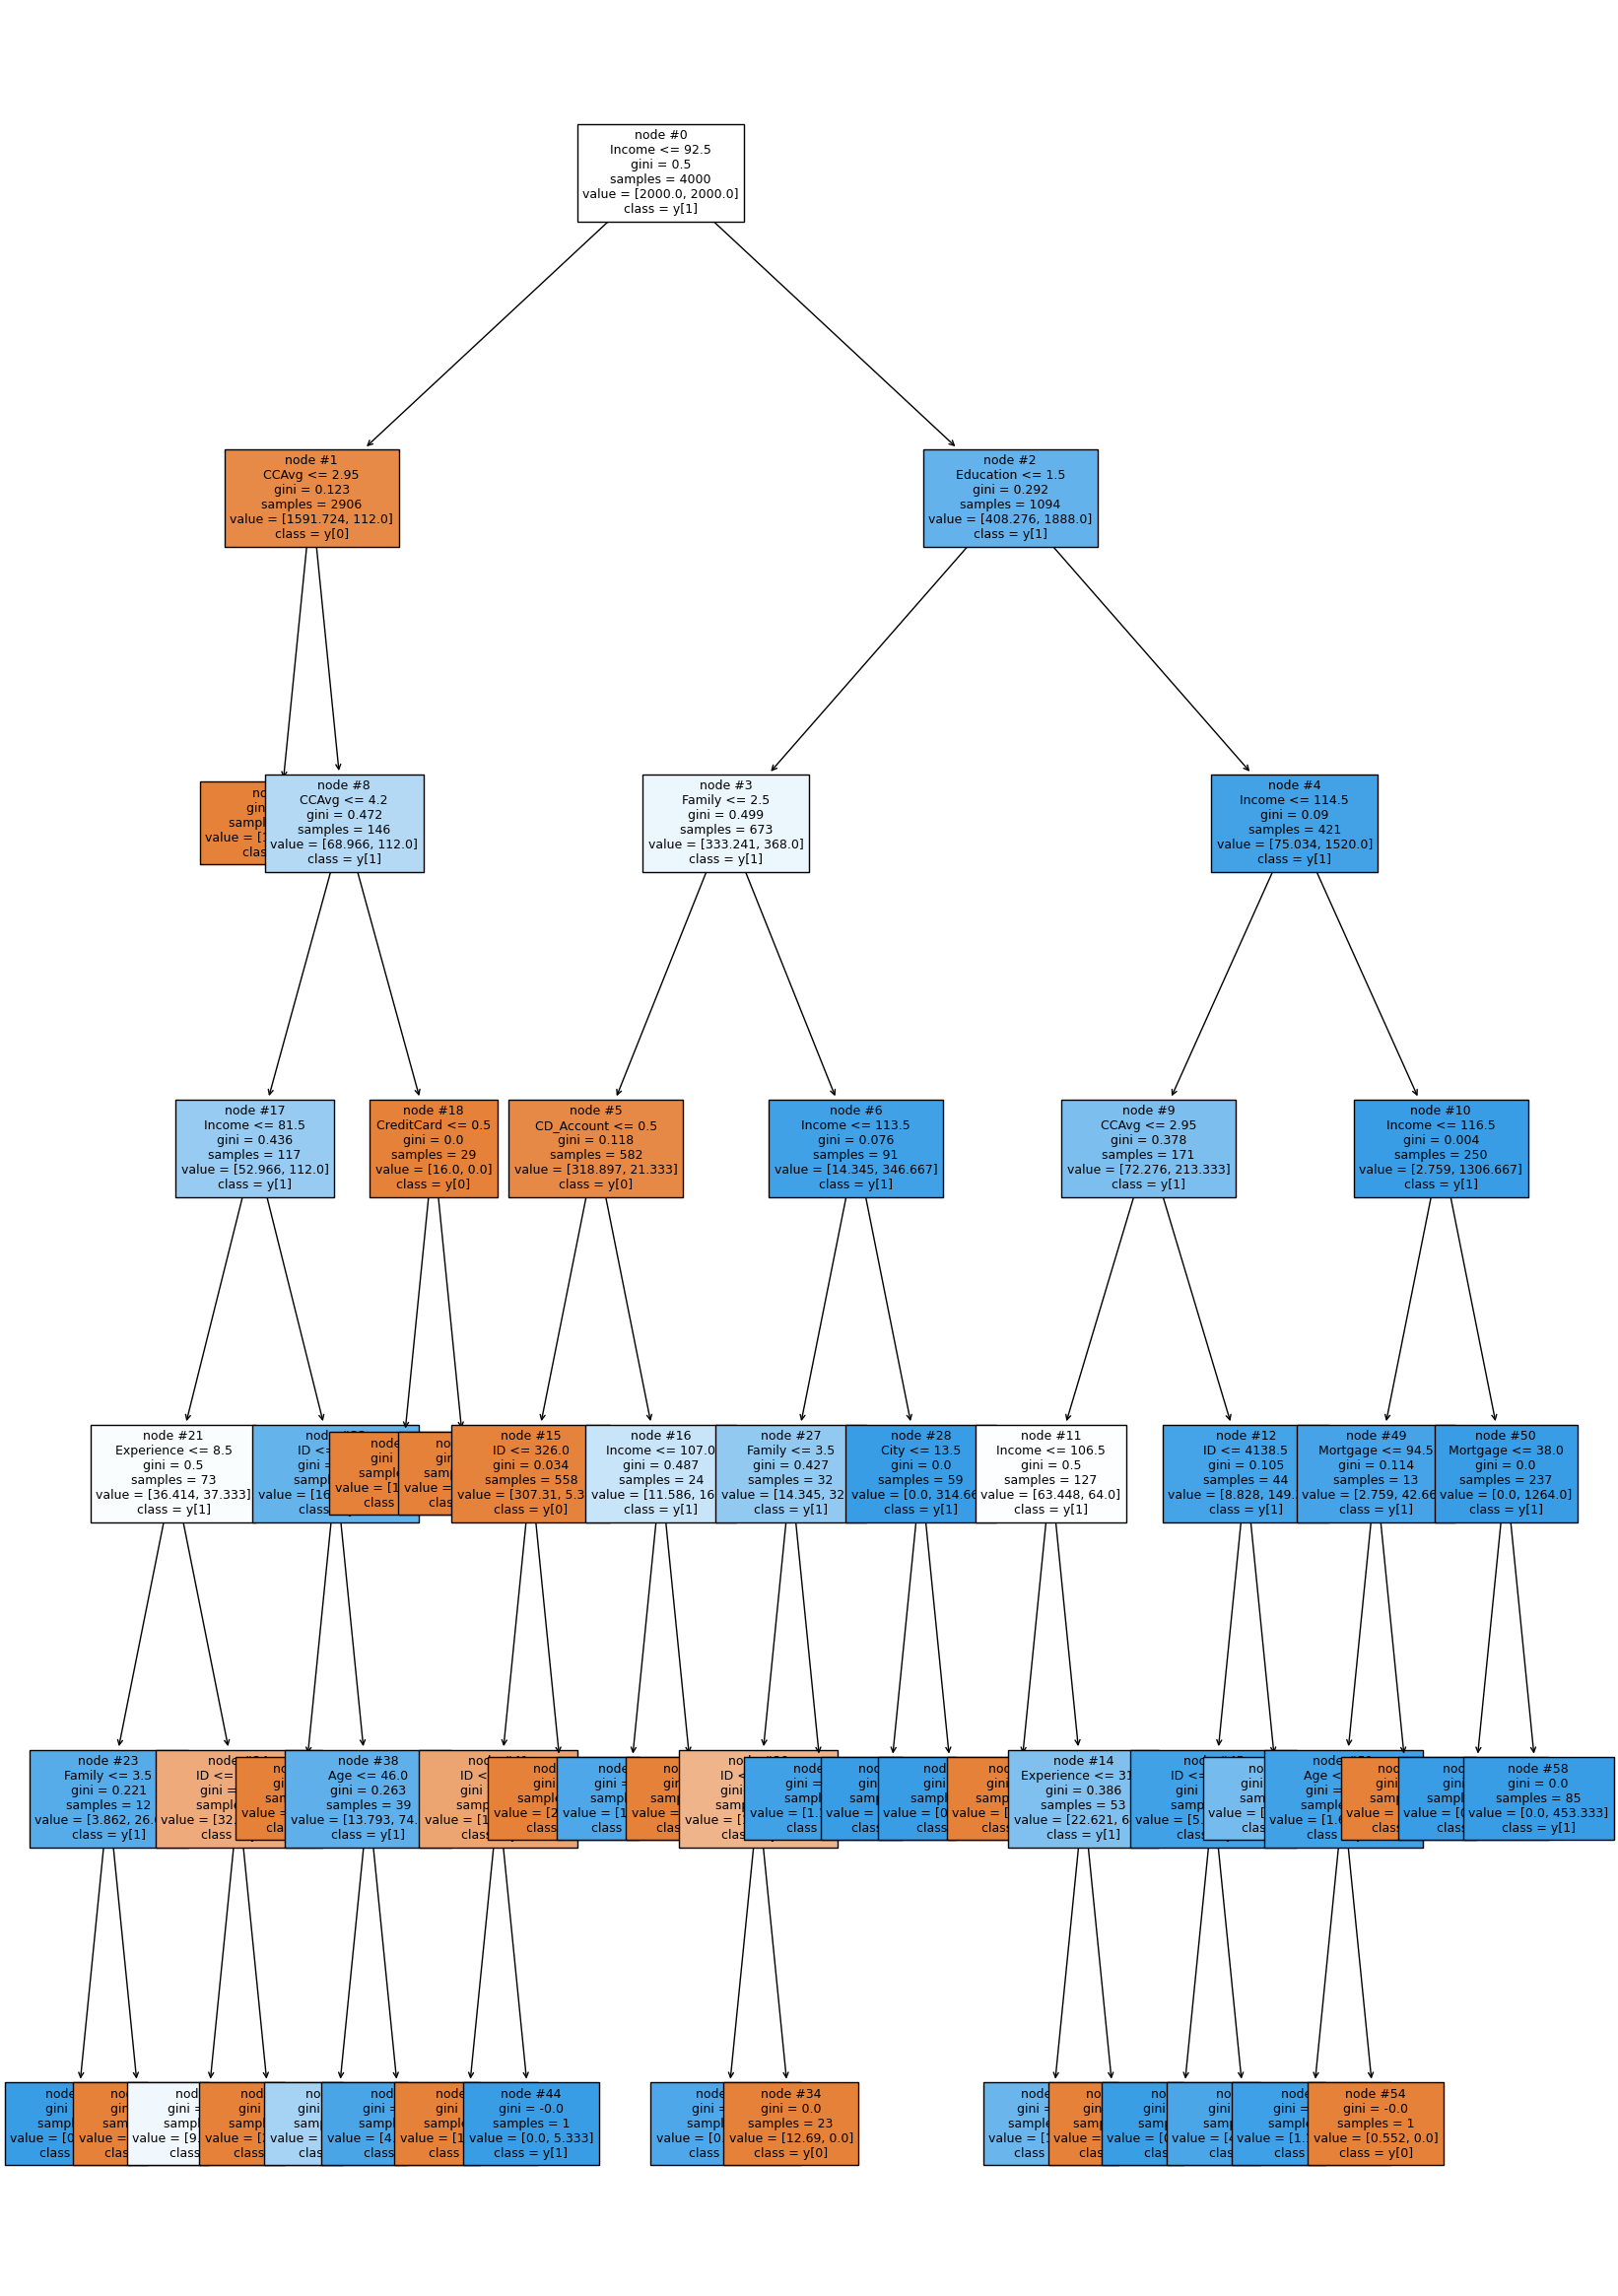

In [74]:
#Precision Score model
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- We can observe that this far less complex than the previous one.But still a complex tree,.


In [75]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1522.76, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.20
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 26.67] class: 1
|   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |--- weights: [3.86, 0.00] class: 0
|   |   |   |   |--- Experience >  8.50
|   |   |   |   |   |--- ID <= 1834.00
|   |   |   |   |   |   |--- weights: [9.93, 10.67] class: 1
|   |   |   |   |   |--- ID >  1834.00
|   |   |   |   |   |   |--- weights: [22.62, 0.00] class: 0
|   |   |   |--- Income >  81.50
|   |   |   |   |--- ID <= 387.50
|   |   |   |   |   |--- weights: [2.76, 0.00] class: 0
|   |   |   |   |--- ID >  387.50
|   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |--- weights: [8.83, 16.00] class: 1
|   |   |   |   |   |--- Age >  46.00
|   |   |   |   |   |   |--- weights: [4.97, 58.67]

####**Feature Importances**

In [76]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              6.279142e-01
Family              1.557499e-01
Education           9.301766e-02
CCAvg               8.589965e-02
ID                  1.464452e-02
Experience          1.139513e-02
CD_Account          8.367714e-03
Age                 1.972025e-03
Mortgage            1.039263e-03
CreditCard          4.292693e-16
City                2.183352e-16
Securities_Account  0.000000e+00
Online              0.000000e+00


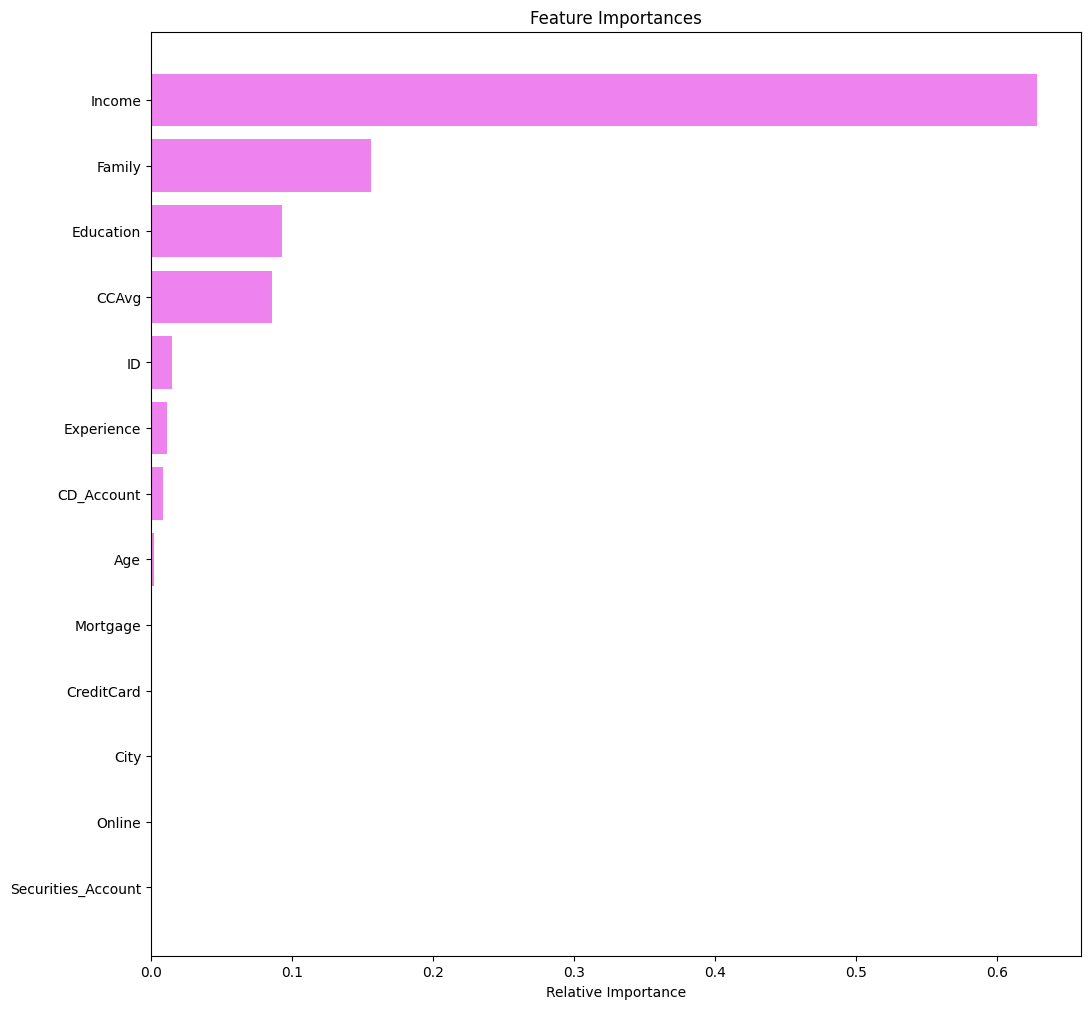

In [77]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### **Decision Tree (Post pruning)**

Cost complexity pruning provides another option to control the size of a tree.
In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha.
Greater values of ccp_alpha increase the number of nodes pruned.
Here we only show the effect of ccp_alpha on regularizing the trees and how to choose the optimal ccp_alpha value.

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [78]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [79]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000235    0.000471
2     0.000242    0.001439
3     0.000250    0.001939
4     0.000250    0.002189
5     0.000252    0.002693
6     0.000284    0.003830
7     0.000306    0.005054
8     0.000333    0.006054
9     0.000375    0.006804
10    0.000375    0.007179
11    0.000400    0.007579
12    0.000409    0.008397
13    0.000429    0.008826
14    0.000441    0.009267
15    0.000450    0.011067
16    0.000563    0.012192
17    0.000570    0.013332
18    0.000600    0.013932
19    0.000600    0.014532
20    0.000629    0.015790
21    0.000630    0.016420
22    0.000643    0.017063
23    0.000681    0.017743
24    0.000750    0.018493
25    0.000778    0.019271
26    0.000804    0.020075
27    0.000838    0.020912
28    0.000840    0.021753
29    0.000854    0.022607
30    0.000942    0.023549
31    0.001165    0.024713
32    0.001693    0.028100
33    0.002402    0.030502
34    0.003197    0.033699
35    0.005758    0.039458
36    0.026166    0.065623
37    0.052149    0.169922

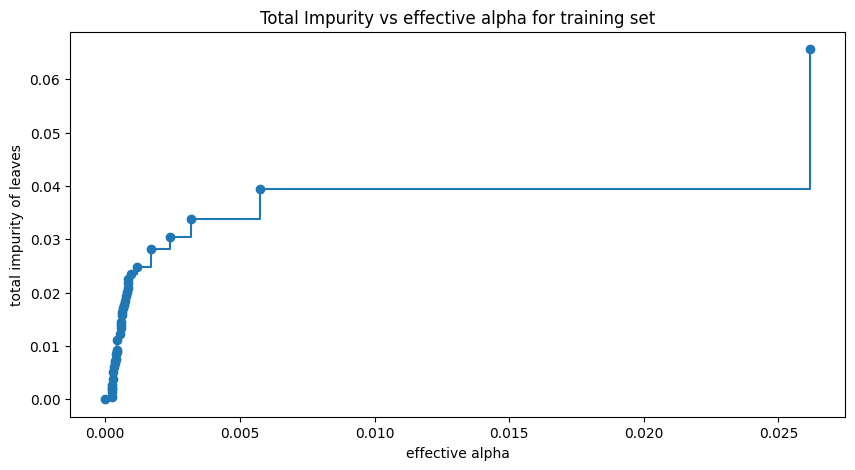

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [81]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05214930148943829



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

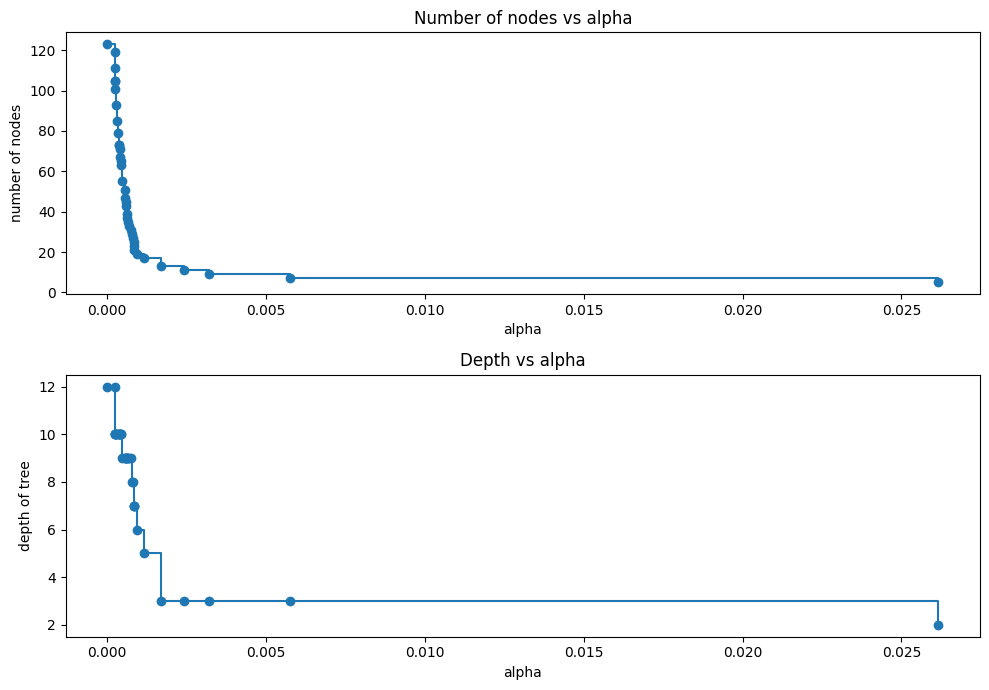

In [82]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Precision Vs alpha for training and testing sets

In [83]:
precision_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = precision_score(y_train, pred_train)
    precision_train.append(values_train)

In [84]:
precision_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = precision_score(y_test, pred_test)
    precision_test.append(values_test)

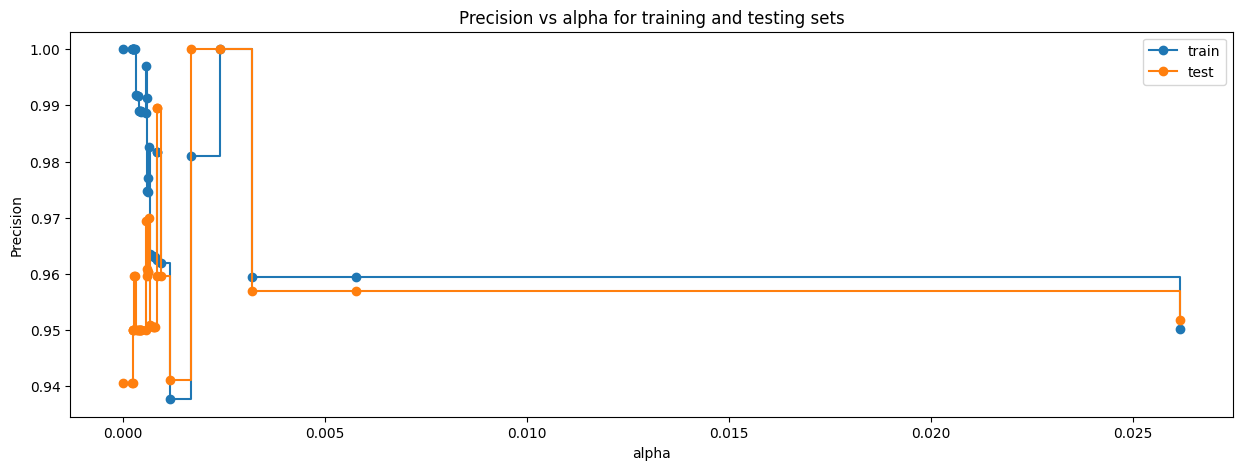

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

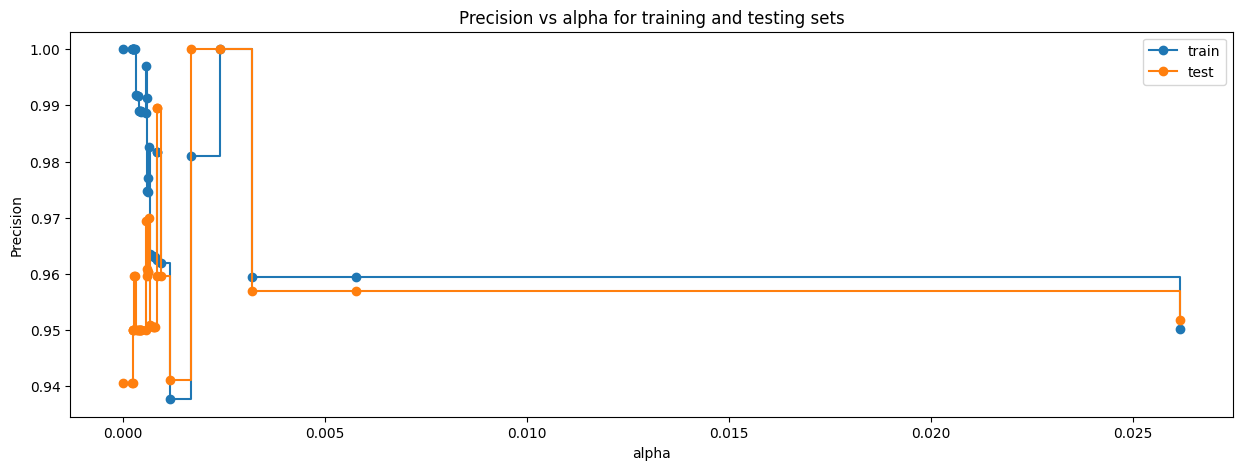

In [86]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [87]:
# creating the model where we get highest train and test precision
index_best_model = np.argmax(precision_test)

# selcting the decision tree model corresponding to the highest test score
best_model = clfs[index_best_model]

print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0016931576164524002, random_state=42)


#### Checking model performance on training set

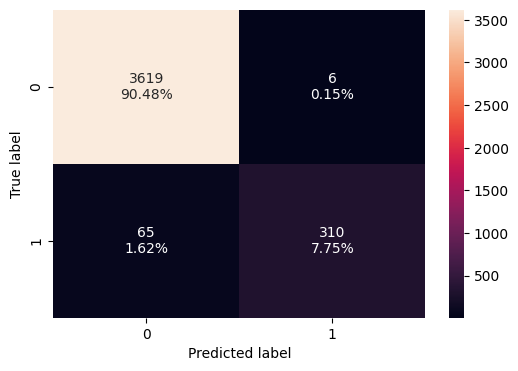

In [88]:
postpruned_model = best_model
confusion_matrix_sklearn(postpruned_model, X_train, y_train)


In [89]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    postpruned_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision       F1
0   0.98225  0.826667   0.981013  0.89725

#### Checking model performance on test set

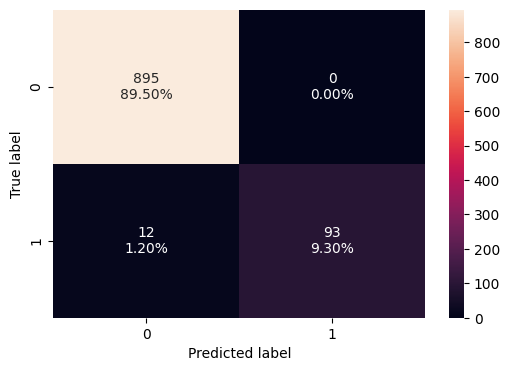

In [90]:
confusion_matrix_sklearn(postpruned_model, X_test, y_test)


In [91]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
   postpruned_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0     0.988  0.885714        1.0  0.939394

* With post-pruning we are getting good and generalized model performance on both training and test set.

#### Visualizing Decision Tree

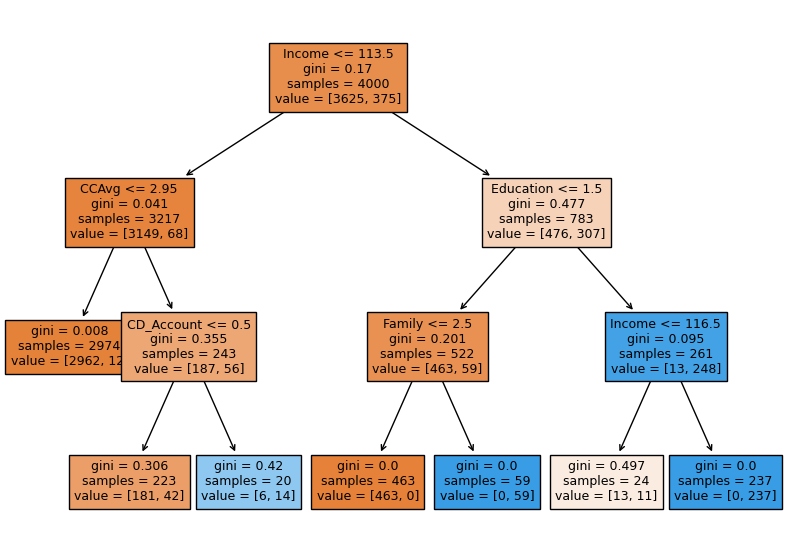

In [92]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    postpruned_model,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [93]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        postpruned_model,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2962.00, 12.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [181.00, 42.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [6.00, 14.00] class: 1
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [463.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 59.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.00, 11.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 237.00] class: 1



####**Feature Importances**

In [94]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        postpruned_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.429930
Income              0.328032
Family              0.184497
CCAvg               0.040602
CD_Account          0.016940
ID                  0.000000
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000
City                0.000000


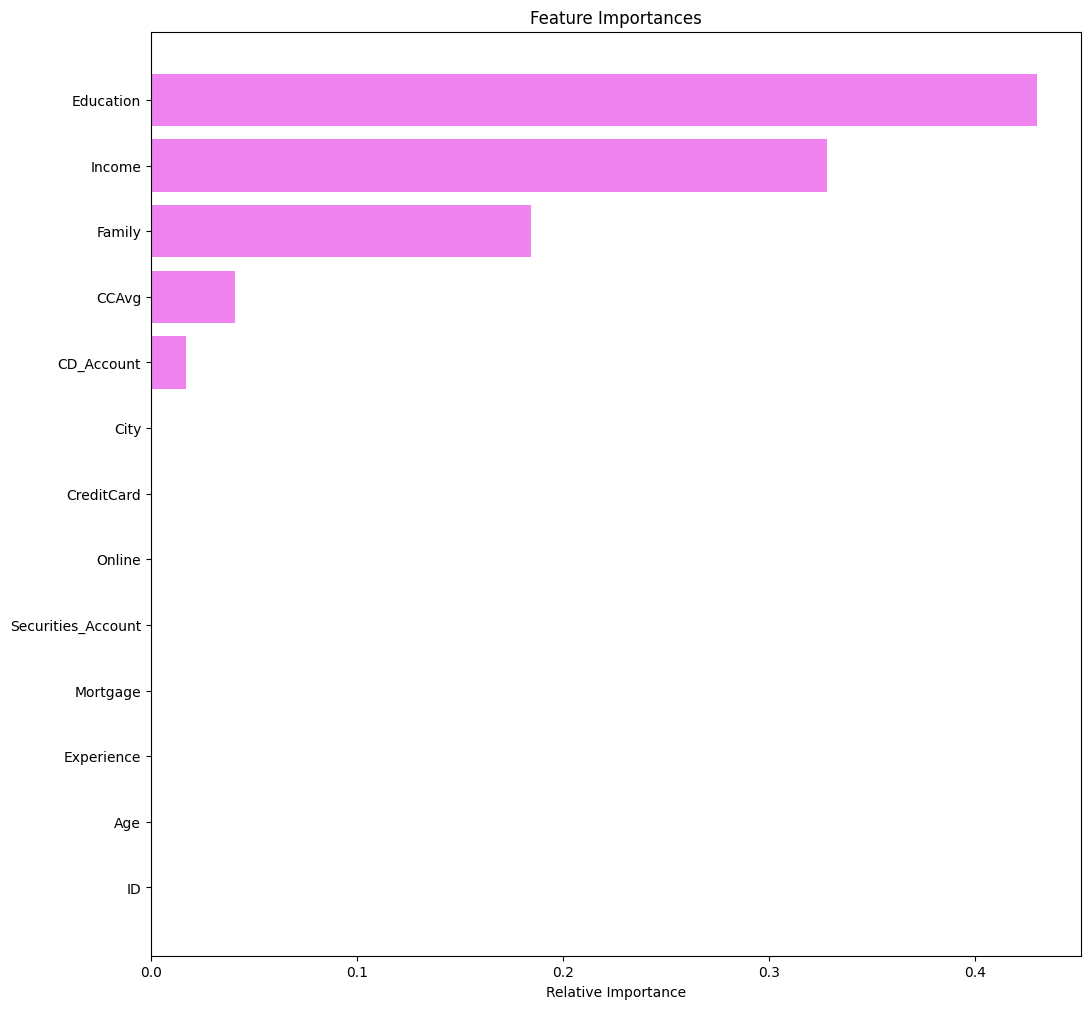

In [95]:
importances = postpruned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education,Income and Family are the most important in post pruning too

## Model Performance Comparison and Final Model Selection

In [96]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
     "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.976000                      0.982250  
Recall                        1.000000                      0.826667  
Precision                     0.796178                      0.981013  
F1                            0.886525                      0.897250

In [97]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.984000                         0.982000   
Recall                            0.904762                         0.904762   
Precision                         0.940594                         0.922330   
F1                                0.922330                         0.913462   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.971000                      0.988000  
Recall                        0.971429                      0.885714  
Precision                     0.796875                      1.000000  
F1                            0.875536                      0.939394

* Decision tree models with post-pruning is giving high precision scores on both training and test sets.
* Therefore, we are choosing the post-pruned tree as our best model.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* Education,Income, and Family are the top 3 most important variables in determining if a customer will buy a personal loan
* The bank can deploy post-pruning model for the next Personal Loan Campaign
* Criteria for a customer to buy Personal Loan according to decision tree model should depend on the 5 attributes - Income,Education,Family, CCAvg and CD_Account
* Few Insights: If the Income is <= 113000 Dollars and credit card average usage is <= 2950 Dollars , customer will not buy personal loan
* If the customer income is more than 116500 Dollars and is graduate or Professional , customer is most likely to buy a Personal Loan.


